<a href="https://colab.research.google.com/github/newbiepawel/Hello-Github/blob/master/LuxMed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving fakty.csv to fakty.csv


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
import io
import pandas as pd
import numpy as np

fakty = pd.read_csv(io.BytesIO(uploaded['fakty.csv']), sep =';')
fakty.head()

,PER_ID,LINE_ID,UNIT_ID,VER_ID,CAT_ID,DRV_ID,INTCO_ID,PROJ_ID,ACC_ID,DT_UNIT_ID,DT_DRV_ID,DT_PROJ_ID,DT_GRUPA_KAPITALOWA_ID,DT_CUST_ID,VALUE
0,201201,25668,8103,900,4001,10503,0,111869207,0,20934,126,111869207,990,31869,90.0
1,201201,25668,8103,900,4001,10503,0,111869207,0,20934,127,111869207,736,30695,30.0
2,201201,25668,8103,900,4001,10503,0,111869207,0,20934,127,111869207,1059,39186,30.0
3,201201,25668,8103,900,4001,10503,0,111869207,0,20934,127,111869207,1150,46896,30.0
4,201201,25668,8103,900,4001,10503,0,111869207,0,20934,128,111869207,669,35369,10.0


Posortowanie danych po id klienta i dacie

In [29]:
fakty = fakty.sort_values(['DT_CUST_ID', 'PER_ID'])
fakty.head()

,PER_ID,LINE_ID,UNIT_ID,VER_ID,CAT_ID,DRV_ID,INTCO_ID,PROJ_ID,ACC_ID,DT_UNIT_ID,DT_DRV_ID,DT_PROJ_ID,DT_GRUPA_KAPITALOWA_ID,DT_CUST_ID,VALUE
256828,201201,25664,8308,900,4001,0,0,111869165,0,-8308,0,111869165,0,0,0.0
257405,201201,25664,8103,900,4003,0,0,111869226,0,-8103,0,111869226,0,0,0.0
922209,201202,25664,8103,900,4003,0,0,111869226,0,-8103,0,111869226,0,0,0.0
785152,201203,25664,8103,900,4003,0,0,111869226,0,-8103,0,111869226,0,0,0.0
875483,201204,25664,8103,900,4003,0,0,111869226,0,-8103,0,111869226,0,0,0.0


In [30]:
fakty.shape

(1048575, 15)

Brak nulli w danych

In [6]:
fakty.isnull().sum()

PER_ID                    0
LINE_ID                   0
UNIT_ID                   0
VER_ID                    0
CAT_ID                    0
DRV_ID                    0
INTCO_ID                  0
PROJ_ID                   0
ACC_ID                    0
DT_UNIT_ID                0
DT_DRV_ID                 0
DT_PROJ_ID                0
DT_GRUPA_KAPITALOWA_ID    0
DT_CUST_ID                0
VALUE                     0
dtype: int64

Liczba unikalnych wartośći dla każdej zmiennej

In [7]:
for col in fakty.columns:
    print(col, ': ', len(fakty[col].unique()), ' unique values')

PER_ID :  33  unique values
LINE_ID :  5  unique values
UNIT_ID :  2  unique values
VER_ID :  1  unique values
CAT_ID :  9  unique values
DRV_ID :  23  unique values
INTCO_ID :  1  unique values
PROJ_ID :  38  unique values
ACC_ID :  1  unique values
DT_UNIT_ID :  379  unique values
DT_DRV_ID :  136  unique values
DT_PROJ_ID :  38  unique values
DT_GRUPA_KAPITALOWA_ID :  901  unique values
DT_CUST_ID :  4500  unique values
VALUE :  1166  unique values


Unikalne wartości LINE_ID

In [8]:
fakty['LINE_ID'].unique()

array([25664, 25668, 25666, 25667, 25672])

In [9]:
print('procent obserwacji gdzie LINE_ID = 25664:',str(np.round((len(fakty[fakty['LINE_ID']== 25664])/len(fakty)*100),2))+'%')
print('procent obserwacji gdzie LINE_ID = 25668:',str(np.round((len(fakty[fakty['LINE_ID']== 25668])/len(fakty)*100),2))+'%')
print('procent obserwacji gdzie LINE_ID = 25666:',str(np.round((len(fakty[fakty['LINE_ID']== 25666])/len(fakty)*100),2))+'%')
print('procent obserwacji gdzie LINE_ID = 25667:',str(np.round((len(fakty[fakty['LINE_ID']== 25667])/len(fakty)*100),2))+'%')
print('procent obserwacji gdzie LINE_ID = 25672:',str(np.round((len(fakty[fakty['LINE_ID']== 25672])/len(fakty)*100),2))+'%')

procent obserwacji gdzie LINE_ID = 25664: 8.77%
procent obserwacji gdzie LINE_ID = 25668: 30.01%
procent obserwacji gdzie LINE_ID = 25666: 26.6%
procent obserwacji gdzie LINE_ID = 25667: 25.8%
procent obserwacji gdzie LINE_ID = 25672: 8.81%


ARPU

Wzór (na podstawie line_id): 25672 / 25664

Opis: Średni przychód na abonenta.

Uwagi:
Tylko dla cat_id typu Abonament% lub CoPayment%. W przypadku kalkulacji za okres dłuższy niż 1 miesiąc, jest to średnia ważona liczbą abonentów.


Stworzenie listy DT_CUST_ID dla których występuje LINE_ID = 25672 i 25664

In [31]:
a = fakty[fakty['LINE_ID'] ==25672]['DT_CUST_ID'].unique()
b = fakty[fakty['LINE_ID'] ==25664]['DT_CUST_ID'].unique()
c = []
for i in fakty['DT_CUST_ID'].unique():
  if (i in a) & (i in b):
    c.append(i)

Stworzenie dodatkowej zmiennej(cat_id_name) dla łatwiejszego filtrowania zmiennych dla cat_D typu Abonament% lub CoPayment%

Na podstawie:

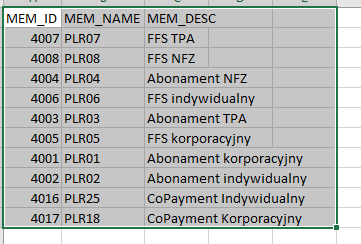

In [32]:
slownik= {4004: 'Abonament NFZ', 4003: 'Abonament TPA', 4001: 'Abonament korporacyjny', 4002: 'Abonament indywidualny',
          4016: 'CoPayment Indywidualny', 4017: 'CoPayment Korporacyjny', 4007: 'FFS TPA', 4008: 'FFS NFZ', 4006: 'FFS indywidualny',
          4005: 'FFS korporacyjny'}

fakty['cat_id_name'] = fakty['CAT_ID'].map(slownik)
fakty.head(10)        

,PER_ID,LINE_ID,UNIT_ID,VER_ID,CAT_ID,DRV_ID,INTCO_ID,PROJ_ID,ACC_ID,DT_UNIT_ID,DT_DRV_ID,DT_PROJ_ID,DT_GRUPA_KAPITALOWA_ID,DT_CUST_ID,VALUE,cat_id_name
256828,201201,25664,8308,900,4001,0,0,111869165,0,-8308,0,111869165,0,0,0.0,Abonament korporacyjny
257405,201201,25664,8103,900,4003,0,0,111869226,0,-8103,0,111869226,0,0,0.0,Abonament TPA
922209,201202,25664,8103,900,4003,0,0,111869226,0,-8103,0,111869226,0,0,0.0,Abonament TPA
785152,201203,25664,8103,900,4003,0,0,111869226,0,-8103,0,111869226,0,0,0.0,Abonament TPA
875483,201204,25664,8103,900,4003,0,0,111869226,0,-8103,0,111869226,0,0,0.0,Abonament TPA
197459,201205,25664,8103,900,4003,0,0,111869226,0,-8103,0,111869226,0,0,0.0,Abonament TPA
1035522,201207,25664,8103,900,4003,0,0,111869226,0,-8103,0,111869226,0,0,0.0,Abonament TPA
455696,201208,25668,8103,900,4001,10503,0,117848295,0,24090,122,117848295,0,0,10.0,Abonament korporacyjny
455708,201208,25668,8103,900,4001,10503,0,117848295,0,24090,123,117848295,0,0,10.0,Abonament korporacyjny
465965,201209,25668,8103,900,4001,11511,0,111869219,0,20942,20,111869219,0,0,70.0,Abonament korporacyjny


Stworzenie nowego data frame(df), dla klientów, dla których występuje LINE_ID:25672 oraz 25664 i cat_id Abonament% lub CoPayment%(jak w treści zadania)

In [33]:
df = fakty[(fakty['DT_CUST_ID'].isin(c)) & ((fakty['cat_id_name'][0][0] == 'A') or (fakty['cat_id_name'][0][0] == 'C'))]
df.shape, fakty.shape

((1035356, 16), (1048575, 16))

In [13]:
df.head()

,PER_ID,LINE_ID,UNIT_ID,VER_ID,CAT_ID,DRV_ID,INTCO_ID,PROJ_ID,ACC_ID,DT_UNIT_ID,DT_DRV_ID,DT_PROJ_ID,DT_GRUPA_KAPITALOWA_ID,DT_CUST_ID,VALUE,cat_id_name
256828,201201,25664,8308,900,4001,0,0,111869165,0,-8308,0,111869165,0,0,0.0,Abonament korporacyjny
257405,201201,25664,8103,900,4003,0,0,111869226,0,-8103,0,111869226,0,0,0.0,Abonament TPA
922209,201202,25664,8103,900,4003,0,0,111869226,0,-8103,0,111869226,0,0,0.0,Abonament TPA
785152,201203,25664,8103,900,4003,0,0,111869226,0,-8103,0,111869226,0,0,0.0,Abonament TPA
875483,201204,25664,8103,900,4003,0,0,111869226,0,-8103,0,111869226,0,0,0.0,Abonament TPA


Tworzenie wskażnika ARPU po DT_CUST_ID(gdzie grupa kapitalowa = 0)

In [34]:
arpu = df[(df['LINE_ID']==25672)& (df['DT_GRUPA_KAPITALOWA_ID'] ==0)].groupby('DT_CUST_ID')['VALUE'].sum()/\
df[(df['LINE_ID'] == 25664) &(df['DT_GRUPA_KAPITALOWA_ID']==0)].groupby('DT_CUST_ID')['VALUE'].sum()
arpu = pd.DataFrame(arpu)
arpu.reset_index(inplace=True)
arpu.head()

,DT_CUST_ID,VALUE
0,0,0.0
1,669,NaN
2,2451,inf
3,40093,inf
4,44551,51.0


Powód wartości NaN: brak jednego z LINE_ID niezbędnych do wyliczenia ARPU dla danego DT_CUST_ID

In [15]:
df[(df['DT_CUST_ID']== 669) & (df['DT_GRUPA_KAPITALOWA_ID'] ==0)]['LINE_ID'].unique()

array([25668, 25666, 25664])

Powód, dla którego wsytępują wartości "inf" to skutek tego, że dzieli się coś czego nie ma przez jakąś wartość. Przykład: dla kontrahenta o id = 669 gdzie nie ma grupy kapitałowej nie występują obserwacje z LINE_ID = 25672, zatem chcąc wyliczyć ARPU dzielimy coś co nie występuje przez wartości gdzie występuje LINE_ID =25664. Moim zdaniem rozsądnym rozwiązaniem jest tutaj przypisanie wartości 0 w takiej sytuacji. 

Tworzeni wskażnika ARPU po grupie kapitałowej(gdzie DT_GRUPA_KAPITALOWA_ID nie jest 0)

In [35]:
arpu2 = df[(df['LINE_ID']==25672)& (df['DT_GRUPA_KAPITALOWA_ID'] !=0)].groupby('DT_GRUPA_KAPITALOWA_ID')['VALUE'].sum()/df[(df['LINE_ID'] == 25664)\
&(df['DT_GRUPA_KAPITALOWA_ID']!=0)].groupby('DT_GRUPA_KAPITALOWA_ID')['VALUE'].sum()
arpu2 = pd.DataFrame(arpu2)
arpu2.reset_index(inplace=True)
arpu2.head()

,DT_GRUPA_KAPITALOWA_ID,VALUE
0,202,61.729167
1,203,35.045161
2,204,inf
3,205,49.291667
4,206,29.196970


Uzupełnienie tabeli fakty w dwie dodatkowe kolumny(poniżej złącze je w jedną) dla ARPU po DT_CUST_ID i osobna po grupie kapitałowej

In [36]:
fakty = fakty.merge(arpu, on = 'DT_CUST_ID', how = 'left')
fakty.rename(columns={"VALUE_x": "VALUE", "VALUE_y": "ARPU"}, inplace=True)
fakty = fakty.merge(arpu2, on = 'DT_GRUPA_KAPITALOWA_ID', how = 'left')
fakty.rename(columns={"VALUE_x": "VALUE", "VALUE_y": "ARPU2"}, inplace=True)
fakty.head()

,PER_ID,LINE_ID,UNIT_ID,VER_ID,CAT_ID,DRV_ID,INTCO_ID,PROJ_ID,ACC_ID,DT_UNIT_ID,DT_DRV_ID,DT_PROJ_ID,DT_GRUPA_KAPITALOWA_ID,DT_CUST_ID,VALUE,cat_id_name,ARPU,ARPU2
0,201201,25664,8308,900,4001,0,0,111869165,0,-8308,0,111869165,0,0,0.0,Abonament korporacyjny,0.0,NaN
1,201201,25664,8103,900,4003,0,0,111869226,0,-8103,0,111869226,0,0,0.0,Abonament TPA,0.0,NaN
2,201202,25664,8103,900,4003,0,0,111869226,0,-8103,0,111869226,0,0,0.0,Abonament TPA,0.0,NaN
3,201203,25664,8103,900,4003,0,0,111869226,0,-8103,0,111869226,0,0,0.0,Abonament TPA,0.0,NaN
4,201204,25664,8103,900,4003,0,0,111869226,0,-8103,0,111869226,0,0,0.0,Abonament TPA,0.0,NaN


Jako, że uzupełniałem tabele fakty w nową kolumne ARPU i ARPU2 po DT_CUST_ID muszę jeszcze zaaplikować poniższy kod

In [37]:
fakty['ARPU2'][fakty['DT_GRUPA_KAPITALOWA_ID']==0] = 0
fakty['ARPU'][fakty['DT_GRUPA_KAPITALOWA_ID']!=0] = 0

Wspomniany wcześniej problem z wartościami inf(infinity) czyli wartość maxymalna. Zmiana wartości inf na 0

In [19]:
fakty['ARPU'].max()

inf

In [38]:
fakty['ARPU'][fakty['ARPU']==fakty['ARPU'].max()] =0
fakty['ARPU'].max()

51.0

In [41]:
fakty['ARPU2'].max()

0.0

In [39]:
fakty['ARPU2'][fakty['ARPU2']==fakty['ARPU2'].max()] = 0
fakty['ARPU2'].max()

2516.5

In [40]:
fakty['ARPU'].fillna(0, inplace = True)
fakty['ARPU2'].fillna(0, inplace = True)

Upewniam się czy nie popełniłem i czy kolumna ARPU(po DT_CUST_ID) jak nie jest równa zero to czy kolumna ARPU2(po grupie kapitałowej) też nie jest zero.
Nie występuje taka sytuacja

In [42]:
fakty[(fakty['ARPU'] !=0) & (fakty['ARPU2']!=0)].head()

,PER_ID,LINE_ID,UNIT_ID,VER_ID,CAT_ID,DRV_ID,INTCO_ID,PROJ_ID,ACC_ID,DT_UNIT_ID,DT_DRV_ID,DT_PROJ_ID,DT_GRUPA_KAPITALOWA_ID,DT_CUST_ID,VALUE,cat_id_name,ARPU,ARPU2


Łączę kolumne ARPU i ARPU2 w jedną ARPU.
Jako, że sprawdziłem, że jeżeli w ARPU wartość jest różna od zera to w ARPU nie występuje wartość różna od zera.

In [43]:
fakty['ARPU'] = fakty['ARPU']+fakty['ARPU2']
fakty.drop(['ARPU2'], axis = 1, inplace=True)
fakty.head()

,PER_ID,LINE_ID,UNIT_ID,VER_ID,CAT_ID,DRV_ID,INTCO_ID,PROJ_ID,ACC_ID,DT_UNIT_ID,DT_DRV_ID,DT_PROJ_ID,DT_GRUPA_KAPITALOWA_ID,DT_CUST_ID,VALUE,cat_id_name,ARPU
0,201201,25664,8308,900,4001,0,0,111869165,0,-8308,0,111869165,0,0,0.0,Abonament korporacyjny,0.0
1,201201,25664,8103,900,4003,0,0,111869226,0,-8103,0,111869226,0,0,0.0,Abonament TPA,0.0
2,201202,25664,8103,900,4003,0,0,111869226,0,-8103,0,111869226,0,0,0.0,Abonament TPA,0.0
3,201203,25664,8103,900,4003,0,0,111869226,0,-8103,0,111869226,0,0,0.0,Abonament TPA,0.0
4,201204,25664,8103,900,4003,0,0,111869226,0,-8103,0,111869226,0,0,0.0,Abonament TPA,0.0


In [26]:
fakty[fakty['ARPU']==0]['PER_ID'].count()/len(fakty)

0.025665307679469757

Z powowdu kilka outlierów wizualizacja jest nieczytelna.
Poniżej spróbuję zwizualizować wskażnik ARPU do 0.99 i 0.95 kwantyla

In [27]:
plt.figure(figsize = (10,6))
plt.title(label = 'Dystrybucja wskażnika ARPU', fontsize = 20)
plt.xlabel(xlabel = 'wartość', fontsize = 14)
plt.ylabel(ylabel = 'Częstość', fontsize = 14)
plt.hist(fakty['ARPU'], bins = 50);

NameError: ignored

In [ ]:
fakty['ARPU'].quantile(0.99)

In [ ]:
plt.figure(figsize = (10,6))
plt.title(label = 'Dystrybucja wskażnika ARPU(do 0.99 kwantyla)', fontsize = 20)
plt.xlabel(xlabel = 'wartość', fontsize = 14)
plt.ylabel(ylabel = 'Częstość', fontsize = 14)
plt.hist(fakty['ARPU'][fakty['ARPU'] < fakty['ARPU'].quantile(0.99)], bins = 50);

In [ ]:
plt.figure(figsize = (10,6))
plt.title(label = 'Dystrybucja wskażnika ARPU(do 0.95 kwantyla)', fontsize = 20)
plt.xlabel(xlabel = 'wartość', fontsize = 14)
plt.ylabel(ylabel = 'Częstość', fontsize = 14)
plt.hist(fakty['ARPU'][fakty['ARPU'] < fakty['ARPU'].quantile(0.95)], bins = 50);

In [ ]:
 from scipy.stats import mode

Ze względu na bardzo duże wartości odstające postanowiłem w statystykach opisowych nie uwzględniać średniej gdyż "zakłamie" ona obraz rozkładu miary ARPU, zamiast tego użyję mediany wykorzystując bibliotekę scipy

In [ ]:
print('Minimalna wartość ARPU:', fakty['ARPU'].min(),'\n',
      'Mediana:', mode(fakty['ARPU'])[0], '\n',
      'Maksymalna wartość:', fakty['ARPU'].max())

##Szkodowość
Wzór(na podstawie line_id):25666 / 25664

Opis:Średnia miesięczna liczba usług wykonanych przez 1 abonenta.

Uwagi:
Tylko dla cat_id typu Abonament% lub CoPayment%. W przypadku kalkulacji za okres dłuższy niż 1 miesiąc, jest to średnia ważona liczbą abonentów.


In [44]:
d = fakty[fakty['LINE_ID'] ==25666]['DT_CUST_ID'].unique()
e = fakty[fakty['LINE_ID'] ==25664]['DT_CUST_ID'].unique()
f = []
for i in fakty['DT_CUST_ID'].unique():
  if (i in d) & (i in e):
    f.append(i)

In [45]:
df1 = fakty[(fakty['DT_CUST_ID'].isin(f)) & ((fakty['cat_id_name'][0][0] == 'A') or (fakty['cat_id_name'][0][0] == 'C'))]
print(df1.shape)
df1.head()

(1031676, 17)


,PER_ID,LINE_ID,UNIT_ID,VER_ID,CAT_ID,DRV_ID,INTCO_ID,PROJ_ID,ACC_ID,DT_UNIT_ID,DT_DRV_ID,DT_PROJ_ID,DT_GRUPA_KAPITALOWA_ID,DT_CUST_ID,VALUE,cat_id_name,ARPU
0,201201,25664,8308,900,4001,0,0,111869165,0,-8308,0,111869165,0,0,0.0,Abonament korporacyjny,0.0
1,201201,25664,8103,900,4003,0,0,111869226,0,-8103,0,111869226,0,0,0.0,Abonament TPA,0.0
2,201202,25664,8103,900,4003,0,0,111869226,0,-8103,0,111869226,0,0,0.0,Abonament TPA,0.0
3,201203,25664,8103,900,4003,0,0,111869226,0,-8103,0,111869226,0,0,0.0,Abonament TPA,0.0
4,201204,25664,8103,900,4003,0,0,111869226,0,-8103,0,111869226,0,0,0.0,Abonament TPA,0.0


In [46]:
szkodowosc = df[(df['LINE_ID']==25666)& (df['DT_GRUPA_KAPITALOWA_ID'] ==0)].groupby('DT_CUST_ID')['VALUE'].sum()/df[(df['LINE_ID'] == 25664)\
&(df['DT_GRUPA_KAPITALOWA_ID']==0)].groupby('DT_CUST_ID')['VALUE'].sum()
szkodowosc = pd.DataFrame(szkodowosc)
szkodowosc.reset_index(inplace=True)
szkodowosc.head()

,DT_CUST_ID,VALUE
0,0,0.105263
1,669,NaN
2,2451,NaN
3,40093,NaN
4,44551,1.000000


In [47]:
szkodowosc2 = df[(df['LINE_ID']==25666)& (df['DT_GRUPA_KAPITALOWA_ID'] !=0)].groupby('DT_GRUPA_KAPITALOWA_ID')['VALUE'].sum()/\
df[(df['LINE_ID'] == 25664) &(df['DT_GRUPA_KAPITALOWA_ID']!=0)].groupby('DT_GRUPA_KAPITALOWA_ID')['VALUE'].sum()
szkodowosc2 = pd.DataFrame(szkodowosc2)
szkodowosc2.reset_index(inplace=True)
szkodowosc2.head()

,DT_GRUPA_KAPITALOWA_ID,VALUE
0,202,0.479167
1,203,0.593548
2,204,NaN
3,205,0.763889
4,206,0.780303


In [48]:
fakty = fakty.merge(szkodowosc, on = 'DT_CUST_ID', how = 'left')
fakty.rename(columns={"VALUE_x": "VALUE", "VALUE_y": "Szkodowosc"}, inplace=True)
fakty = fakty.merge(szkodowosc2, on = 'DT_GRUPA_KAPITALOWA_ID', how = 'left')
fakty.rename(columns={"VALUE_x": "VALUE", "VALUE_y": "Szkodowosc2"}, inplace=True)
fakty.head()

,PER_ID,LINE_ID,UNIT_ID,VER_ID,CAT_ID,DRV_ID,INTCO_ID,PROJ_ID,ACC_ID,DT_UNIT_ID,DT_DRV_ID,DT_PROJ_ID,DT_GRUPA_KAPITALOWA_ID,DT_CUST_ID,VALUE,cat_id_name,ARPU,Szkodowosc,Szkodowosc2
0,201201,25664,8308,900,4001,0,0,111869165,0,-8308,0,111869165,0,0,0.0,Abonament korporacyjny,0.0,0.105263,NaN
1,201201,25664,8103,900,4003,0,0,111869226,0,-8103,0,111869226,0,0,0.0,Abonament TPA,0.0,0.105263,NaN
2,201202,25664,8103,900,4003,0,0,111869226,0,-8103,0,111869226,0,0,0.0,Abonament TPA,0.0,0.105263,NaN
3,201203,25664,8103,900,4003,0,0,111869226,0,-8103,0,111869226,0,0,0.0,Abonament TPA,0.0,0.105263,NaN
4,201204,25664,8103,900,4003,0,0,111869226,0,-8103,0,111869226,0,0,0.0,Abonament TPA,0.0,0.105263,NaN


In [49]:
fakty['Szkodowosc2'][fakty['DT_GRUPA_KAPITALOWA_ID']==0] = 0
fakty['Szkodowosc'][fakty['DT_GRUPA_KAPITALOWA_ID']!=0] = 0

In [ ]:
fakty['Szkodowosc'].max()

In [ ]:
fakty['Szkodowosc2'].max()

In [50]:
fakty['Szkodowosc2'][fakty['Szkodowosc2'] == fakty['Szkodowosc2'].max()] = 0
fakty['Szkodowosc2'].max()

38.5

In [51]:
fakty['Szkodowosc'].fillna(0,inplace = True)
fakty['Szkodowosc2'].fillna(0,inplace = True)

Te same DT_CUST_ID co przy liczeniu ARPU

In [ ]:
fakty[(fakty['Szkodowosc'] !=0) & (fakty['Szkodowosc2']!=0)].head()

In [52]:
fakty['Szkodowosc'] = fakty['Szkodowosc']+fakty['Szkodowosc2']
fakty.drop(['Szkodowosc2'], axis = 1, inplace=True)
fakty.head()

,PER_ID,LINE_ID,UNIT_ID,VER_ID,CAT_ID,DRV_ID,INTCO_ID,PROJ_ID,ACC_ID,DT_UNIT_ID,DT_DRV_ID,DT_PROJ_ID,DT_GRUPA_KAPITALOWA_ID,DT_CUST_ID,VALUE,cat_id_name,ARPU,Szkodowosc
0,201201,25664,8308,900,4001,0,0,111869165,0,-8308,0,111869165,0,0,0.0,Abonament korporacyjny,0.0,0.105263
1,201201,25664,8103,900,4003,0,0,111869226,0,-8103,0,111869226,0,0,0.0,Abonament TPA,0.0,0.105263
2,201202,25664,8103,900,4003,0,0,111869226,0,-8103,0,111869226,0,0,0.0,Abonament TPA,0.0,0.105263
3,201203,25664,8103,900,4003,0,0,111869226,0,-8103,0,111869226,0,0,0.0,Abonament TPA,0.0,0.105263
4,201204,25664,8103,900,4003,0,0,111869226,0,-8103,0,111869226,0,0,0.0,Abonament TPA,0.0,0.105263


In [ ]:
plt.figure(figsize = (10,6))
plt.title(label = 'Dystrybucja wskażnika Szkodowość', fontsize = 20)
plt.xlabel(xlabel = 'wartość', fontsize = 14)
plt.ylabel(ylabel = 'Częstość', fontsize = 14)
plt.hist(fakty['Szkodowosc'], bins = 50);

In [ ]:
plt.figure(figsize = (10,6))
plt.title(label = 'Dystrybucja wskażnika Szkodowość(do 0.99 kwantyla)', fontsize = 20)
plt.xlabel(xlabel = 'wartość', fontsize = 14)
plt.ylabel(ylabel = 'Częstość', fontsize = 14)
plt.hist(fakty['Szkodowosc'][fakty['Szkodowosc'] < fakty['Szkodowosc'].quantile(0.99)], bins = 50);

In [ ]:
print('Minimalna wartość Szkodowości:', fakty['Szkodowosc'].min(),'\n',
      'Mediana:', mode(fakty['Szkodowosc'])[0], '\n',
      'Maksymalna wartość:', fakty['Szkodowosc'].max())

## Marża

Wzór:25672 - 25667

Opis: Zysk po kosztach z ksiąg finansowych.

Uwagi:brak


In [53]:
g = fakty[fakty['LINE_ID'] ==25672]['DT_CUST_ID'].unique()
h = fakty[fakty['LINE_ID'] ==25667]['DT_CUST_ID'].unique()
j = []
for i in fakty['DT_CUST_ID'].unique():
  if (i in g) & (i in h):
    j.append(i)

In [54]:
df2 = fakty[fakty['DT_CUST_ID'].isin(c)]
print(df2.shape)
df2.head()

(1035356, 18)


,PER_ID,LINE_ID,UNIT_ID,VER_ID,CAT_ID,DRV_ID,INTCO_ID,PROJ_ID,ACC_ID,DT_UNIT_ID,DT_DRV_ID,DT_PROJ_ID,DT_GRUPA_KAPITALOWA_ID,DT_CUST_ID,VALUE,cat_id_name,ARPU,Szkodowosc
0,201201,25664,8308,900,4001,0,0,111869165,0,-8308,0,111869165,0,0,0.0,Abonament korporacyjny,0.0,0.105263
1,201201,25664,8103,900,4003,0,0,111869226,0,-8103,0,111869226,0,0,0.0,Abonament TPA,0.0,0.105263
2,201202,25664,8103,900,4003,0,0,111869226,0,-8103,0,111869226,0,0,0.0,Abonament TPA,0.0,0.105263
3,201203,25664,8103,900,4003,0,0,111869226,0,-8103,0,111869226,0,0,0.0,Abonament TPA,0.0,0.105263
4,201204,25664,8103,900,4003,0,0,111869226,0,-8103,0,111869226,0,0,0.0,Abonament TPA,0.0,0.105263


In [55]:
marza = df[(df['LINE_ID']==25672) & (df['DT_GRUPA_KAPITALOWA_ID'] ==0)].groupby('DT_CUST_ID')['VALUE'].sum()-\
df[(df['LINE_ID'] == 25667) &(df['DT_GRUPA_KAPITALOWA_ID']==0)].groupby('DT_CUST_ID')['VALUE'].sum()
marza = pd.DataFrame(marza)
marza.reset_index(inplace=True)
marza.head()

,DT_CUST_ID,VALUE
0,0,0.0
1,2451,80.0
2,40093,-40.0
3,44551,300.0
4,47830,740.0


In [56]:
marza2 = df[(df['LINE_ID']==25672)& (df['DT_GRUPA_KAPITALOWA_ID'] !=0)].groupby('DT_GRUPA_KAPITALOWA_ID')['VALUE'].sum()-\
df[(df['LINE_ID'] == 25667) &(df['DT_GRUPA_KAPITALOWA_ID']!=0)].groupby('DT_GRUPA_KAPITALOWA_ID')['VALUE'].sum()
marza2 = pd.DataFrame(marza2)
marza2.reset_index(inplace=True)
marza2.head()

,DT_GRUPA_KAPITALOWA_ID,VALUE
0,202,18040.0
1,203,34300.0
2,204,NaN
3,205,21690.0
4,206,12180.0


In [57]:
fakty = fakty.merge(marza, on = 'DT_CUST_ID', how = 'left')
fakty.rename(columns={"VALUE_x": "VALUE", "VALUE_y": "marza"}, inplace=True)
fakty = fakty.merge(marza2, on = 'DT_GRUPA_KAPITALOWA_ID', how = 'left')
fakty.rename(columns={"VALUE_x": "VALUE", "VALUE_y": "marza2"}, inplace=True)
fakty.head()

,PER_ID,LINE_ID,UNIT_ID,VER_ID,CAT_ID,DRV_ID,INTCO_ID,PROJ_ID,ACC_ID,DT_UNIT_ID,DT_DRV_ID,DT_PROJ_ID,DT_GRUPA_KAPITALOWA_ID,DT_CUST_ID,VALUE,cat_id_name,ARPU,Szkodowosc,marza,marza2
0,201201,25664,8308,900,4001,0,0,111869165,0,-8308,0,111869165,0,0,0.0,Abonament korporacyjny,0.0,0.105263,0.0,NaN
1,201201,25664,8103,900,4003,0,0,111869226,0,-8103,0,111869226,0,0,0.0,Abonament TPA,0.0,0.105263,0.0,NaN
2,201202,25664,8103,900,4003,0,0,111869226,0,-8103,0,111869226,0,0,0.0,Abonament TPA,0.0,0.105263,0.0,NaN
3,201203,25664,8103,900,4003,0,0,111869226,0,-8103,0,111869226,0,0,0.0,Abonament TPA,0.0,0.105263,0.0,NaN
4,201204,25664,8103,900,4003,0,0,111869226,0,-8103,0,111869226,0,0,0.0,Abonament TPA,0.0,0.105263,0.0,NaN


In [58]:
fakty['marza2'][fakty['DT_GRUPA_KAPITALOWA_ID']==0] = 0
fakty['marza'][fakty['DT_GRUPA_KAPITALOWA_ID']!=0] = 0

In [59]:
fakty['marza'].fillna(0,inplace = True)
fakty['marza2'].fillna(0,inplace = True)

In [60]:
fakty['marza'].max()

740.0

In [ ]:
fakty['marza2'].max()

In [61]:
fakty['marza'] = fakty['marza']+fakty['marza2']
fakty.drop(['marza2'], axis = 1, inplace=True)
fakty.head()

,PER_ID,LINE_ID,UNIT_ID,VER_ID,CAT_ID,DRV_ID,INTCO_ID,PROJ_ID,ACC_ID,DT_UNIT_ID,DT_DRV_ID,DT_PROJ_ID,DT_GRUPA_KAPITALOWA_ID,DT_CUST_ID,VALUE,cat_id_name,ARPU,Szkodowosc,marza
0,201201,25664,8308,900,4001,0,0,111869165,0,-8308,0,111869165,0,0,0.0,Abonament korporacyjny,0.0,0.105263,0.0
1,201201,25664,8103,900,4003,0,0,111869226,0,-8103,0,111869226,0,0,0.0,Abonament TPA,0.0,0.105263,0.0
2,201202,25664,8103,900,4003,0,0,111869226,0,-8103,0,111869226,0,0,0.0,Abonament TPA,0.0,0.105263,0.0
3,201203,25664,8103,900,4003,0,0,111869226,0,-8103,0,111869226,0,0,0.0,Abonament TPA,0.0,0.105263,0.0
4,201204,25664,8103,900,4003,0,0,111869226,0,-8103,0,111869226,0,0,0.0,Abonament TPA,0.0,0.105263,0.0


In [ ]:
plt.figure(figsize = (10,6))
plt.title(label = 'Dystrybucja marży', fontsize = 20)
plt.xlabel(xlabel = 'wartość', fontsize = 14)
plt.ylabel(ylabel = 'Częstość', fontsize = 14)
plt.hist(fakty['marza'], bins = 50);

In [ ]:
plt.figure(figsize = (10,6))
plt.title(label = 'Dystrybucja marży', fontsize = 20)
plt.xlabel(xlabel = 'wartość', fontsize = 14)
plt.ylabel(ylabel = 'Częstość', fontsize = 14)
plt.hist(fakty['marza'][fakty['marza'] < fakty['marza'].quantile(0.95)], bins = 50);

In [ ]:
print('Minimalna wartość marży:', fakty['marza'].min(),'\n',
      'Mediana:', mode(fakty['marza'])[0], '\n',
      'Maksymalna wartość:', fakty['marza'].max())

#Jako nowe spostzreżenia/wskaźniki postanowiłem zaprezentować statystyki opisowe dotyczące wskaźników z podziałem na miasta

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
proj_id = pd.read_csv(io.BytesIO(uploaded['proj_id.csv']), sep =';', encoding= 'unicode_escape')
proj_id.head()

In [ ]:
proj_id.rename(columns={"MEM_ID": "PROJ_ID"}, inplace=True)

In [ ]:
fakty = fakty.merge(proj_id[['PROJ_ID', 'MEM_NAME']], on = 'PROJ_ID', how = 'left')
fakty.head()

In [ ]:
fakty.rename(columns={"MEM_NAME": "Miasto"}, inplace=True)

In [ ]:
fakty.groupby('Miasto')['ARPU'].agg(['min', 'mean', 'std', 'max'])

In [ ]:
fakty.groupby('Miasto')['Szkodowosc'].agg(['min', 'mean', 'std', 'max'])

In [ ]:
fakty.groupby('Miasto')['marza'].agg(['min', 'mean', 'std', 'max'])

Można zauważyć, że wartość minimalna i maxymalna dla wszystkich wskażników we wszystkich miastach jest taka sama. Jest to spowodowane, że grupa kapitałowa(1195), przy której występuję wartość maksymalna(ARPU i Szkodowość, dla marzy jest to grupa kapitałowa 1150) występuje we wszystkich miastach, a wartość minimalna występuje w wielu grupach kapitałowych.
Poniżej sprawdzenie tych faktów:

In [ ]:
#Ilość grup kapitałowych, w których występuje wartość minimalna w porównaniu to ilości całkowitej
len(fakty[fakty['ARPU'] == fakty['ARPU'].min()]['DT_GRUPA_KAPITALOWA_ID'].unique()), fakty['DT_GRUPA_KAPITALOWA_ID'].nunique()

In [ ]:
#Grupa kapitałowa, w której występuje wartość maksymalna
fakty[fakty['ARPU'] == fakty['ARPU'].max()]['DT_GRUPA_KAPITALOWA_ID'].unique()

In [ ]:
#Ilość miast, w któeych występuje grupa kapitałowa 1195 w porównaniu do wszystkich miast
len(fakty[fakty['ARPU'] == fakty['ARPU'].max()]['Miasto'].unique()), fakty['Miasto'].nunique()

Analogicznie dla pozostałych dwóch miar

In [ ]:
fakty[fakty['Szkodowosc'] == fakty['Szkodowosc'].max()]['DT_GRUPA_KAPITALOWA_ID'].unique()

In [ ]:
fakty[fakty['marza'] == fakty['marza'].max()]['DT_GRUPA_KAPITALOWA_ID'].unique()

In [ ]:
len(fakty[fakty['marza'] == fakty['marza'].max()]['Miasto'].unique()), fakty['Miasto'].nunique()

In [ ]:
# pd.to_datetime(fakty['PER_ID']) # if you haven't converted it already
# fakty.groupby(fakty['PER_ID'].dt.to_period('Q'))[fakty('PER_ID')[(fakty['LINE_ID']==25672)& (fakty['DT_GRUPA_KAPITALOWA_ID'] !=0)].groupby(['DT_GRUPA_KAPITALOWA_ID'])['VALUE'].sum()-\
# fakty('PER_ID')[(fakty['LINE_ID'] == 25667) &(fakty['DT_GRUPA_KAPITALOWA_ID']!=0)].groupby(['DT_GRUPA_KAPITALOWA_ID'])['VALUE'].sum()].agg('mean')

In [ ]:
# fakty('PER_ID')[(fakty['LINE_ID']==25672)& (fakty['DT_GRUPA_KAPITALOWA_ID'] !=0)].groupby(['DT_GRUPA_KAPITALOWA_ID'])['VALUE'].sum()-\
# fakty('PER_ID')[(fakty['LINE_ID'] == 25667) &(fakty['DT_GRUPA_KAPITALOWA_ID']!=0)].groupby(['DT_GRUPA_KAPITALOWA_ID'])['VALUE'].sum().resample('Q-JAN', convention='end').agg('mean')

Kategoryzacja (grupowanie) automatyczne kontrahentów* na podstawie 3 miar:
ARPU
Szkodowość
Marża %
W ostatnim kwartale, półroczu, roku (3, 6, 12 miesięcy wstecz od wskazanego miesiąca). Wyniki przedstawione w formie raportu/wizualizacji.

*Kontrahenci bez grupy kapitałowej na poziomie kontrahenta, kontrahenci z przypisanymi grupami kapitałowymi na poziomie grupy.

Tworzenie tabeli ARPU3 gdzie będą wartości średniej ruchomej z okresu 3 miesiący dla ARPU po grupie kapitałowej

In [62]:
ARPU3 = fakty[(fakty['LINE_ID']==25672)& (fakty['DT_GRUPA_KAPITALOWA_ID'] !=0)].groupby(['DT_GRUPA_KAPITALOWA_ID', 'PER_ID'])['VALUE'].sum()/\
fakty[(fakty['LINE_ID'] == 25664) &(fakty['DT_GRUPA_KAPITALOWA_ID']!=0)].groupby(['DT_GRUPA_KAPITALOWA_ID', 'PER_ID'])['VALUE'].sum().rolling(3).mean()
ARPU3 = pd.DataFrame(ARPU3)
ARPU3.reset_index(inplace=True)
ARPU3.head()

,DT_GRUPA_KAPITALOWA_ID,PER_ID,VALUE
0,202,201201,NaN
1,202,201202,NaN
2,202,201203,77.8
3,202,201204,73.6
4,202,201205,72.8


In [63]:
ARPU3.max(), ARPU3.min()

(DT_GRUPA_KAPITALOWA_ID      1382.0
 PER_ID                    201509.0
 VALUE                          inf
 dtype: float64, DT_GRUPA_KAPITALOWA_ID       202.0
 PER_ID                    201201.0
 VALUE                         -inf
 dtype: float64)

Przypisanie wartościom infinity zera

In [65]:
ARPU3['VALUE'][ARPU3['VALUE'] == ARPU3['VALUE'].min()] = 0
ARPU3['VALUE'][ARPU3['VALUE'] == ARPU3['VALUE'].max()] = 0

In [66]:
ARPU3.isnull().sum()

DT_GRUPA_KAPITALOWA_ID       0
PER_ID                       0
VALUE                     2584
dtype: int64

Przypisanie wartościom NULL zera

In [67]:
ARPU3.fillna(0, inplace = True)

Zostawienie w tabeli fakty tylko niezbędnych wartości

In [68]:
fakty = fakty[['PER_ID', 'LINE_ID', 'DT_GRUPA_KAPITALOWA_ID', 'DT_CUST_ID',	'VALUE', 'ARPU',	'Szkodowosc',	'marza']]

Stworzenie klucza(data+grupa kapitałowa), po którym uzupełnię tabelę fakty wartościami z tabeli ARPU3, tym razem nie można połączyć tylko po grupie kapitałowej czy customer id gdyż wartość  opiera się również na dacie

In [69]:
fakty['key'] = fakty['PER_ID'].astype(str)+ fakty['DT_GRUPA_KAPITALOWA_ID'].astype(str)
fakty.sample(5)

,PER_ID,LINE_ID,DT_GRUPA_KAPITALOWA_ID,DT_CUST_ID,VALUE,ARPU,Szkodowosc,marza,key
580023,201301,25667,729,36605,80.0,0.000000,0.000000,1820.0,201301729
154334,201201,25664,1150,21693,0.0,26.698396,0.874308,1283940.0,2012011150
129300,201205,25666,354,20107,0.0,24.283356,0.865199,63810.0,201205354
908474,201202,25664,702,48169,0.0,12.568379,0.550743,17600.0,201202702
12358,201201,25668,920,691,70.0,26.896780,1.098485,18860.0,201201920


Tak samo stworzenie klucza dla tabeli ARPU3

In [70]:
ARPU3['key'] = ARPU3['PER_ID'].astype(str)+ ARPU3['DT_GRUPA_KAPITALOWA_ID'].astype(str)
ARPU3.head()

,DT_GRUPA_KAPITALOWA_ID,PER_ID,VALUE,key
0,202,201201,0.0,201201202
1,202,201202,0.0,201202202
2,202,201203,77.8,201203202
3,202,201204,73.6,201204202
4,202,201205,72.8,201205202


In [71]:
# fakty1 = fakty
# fakty = fakty1

In [ ]:
# fakty = fakty.merge(marza, on = 'DT_CUST_ID', how = 'left')
# fakty.rename(columns={"VALUE_x": "VALUE", "VALUE_y": "marza"}, inplace=True)
# fakty = fakty.merge(marza2, on = 'DT_GRUPA_KAPITALOWA_ID', how = 'left')
# fakty.rename(columns={"VALUE_x": "VALUE", "VALUE_y": "marza2"}, inplace=True)
# fakty.head()

Uzupełnienie tabeli fakty wartościami z tabeli ARPU3 po kluczu

In [72]:
fakty = fakty.merge(ARPU3[['VALUE', 'key']], on = 'key', how = 'left')
fakty.rename(columns={"VALUE_x": "VALUE", "VALUE_y": "ARPU3"}, inplace=True)

fakty.sample(5)

,PER_ID,LINE_ID,DT_GRUPA_KAPITALOWA_ID,DT_CUST_ID,VALUE,ARPU,Szkodowosc,marza,key,ARPU3
632933,201308,25667,715,37517,190.0,19.239468,0.311160,109870.0,201308715,27.541568
293320,201204,25666,940,30282,10.0,2.278554,0.060989,1210.0,201204940,3.535795
639212,201201,25667,664,37726,20.0,42.500000,2.545455,-490.0,201201664,166.500000
72338,201208,25668,829,1547,20.0,33.122881,1.110169,17120.0,201208829,NaN
189280,201301,25667,516,23199,0.0,26.178201,0.792388,32160.0,201301516,28.883721


In [73]:
fakty['ARPU3'].fillna(0, inplace = True)

Tworzenie tabeli ARPU3_ gdzie będą wartości średniej ruchomej z okresu 3 miesiący dla ARPU po DT_CUST_ID

In [74]:
ARPU3_ = fakty[(fakty['LINE_ID']==25672)& (fakty['DT_GRUPA_KAPITALOWA_ID'] ==0)].groupby(['DT_CUST_ID', 'PER_ID'])['VALUE'].sum()/\
fakty[(fakty['LINE_ID'] == 25664) &(fakty['DT_GRUPA_KAPITALOWA_ID']==0)].groupby(['DT_CUST_ID', 'PER_ID'])['VALUE'].sum().rolling(3).mean()
ARPU3_ = pd.DataFrame(ARPU3_)
ARPU3_.reset_index(inplace=True)
ARPU3_.head()

,DT_CUST_ID,PER_ID,VALUE
0,0,201201,NaN
1,0,201202,NaN
2,0,201203,NaN
3,0,201204,NaN
4,0,201205,NaN


In [75]:
ARPU3_.max(), ARPU3_.min()

(DT_CUST_ID     82085.0
 PER_ID        201509.0
 VALUE              inf
 dtype: float64, DT_CUST_ID         0.0
 PER_ID        201201.0
 VALUE             70.5
 dtype: float64)

In [76]:
ARPU3_['VALUE'][ARPU3_['VALUE'] == ARPU3_['VALUE'].max()] = 0

In [77]:
ARPU3_.fillna(0, inplace = True)

Stworzenie kolejnego(osobnego) klucza by uzupełniać dane z tabeli po DT_CUST_ID

In [78]:
fakty['key_'] = fakty['PER_ID'].astype(str)+ fakty['DT_CUST_ID'].astype(str)
fakty.sample(5)

,PER_ID,LINE_ID,DT_GRUPA_KAPITALOWA_ID,DT_CUST_ID,VALUE,ARPU,Szkodowosc,marza,key,ARPU3,key_
140755,201301,25667,894,20268,10.0,36.680000,0.800000,4700.0,201301894,44.571429,20130120268
183664,201204,25664,1004,23101,10.0,29.585185,0.459259,18960.0,2012041004,28.812500,20120423101
817834,201407,25664,702,42433,10.0,12.568379,0.550743,17600.0,201407702,0.000000,20140742433
40207,201201,25666,254,938,0.0,42.264368,1.149425,3320.0,201201254,203.400000,201201938
677758,201205,25672,976,38483,0.0,140.666667,2.500000,3000.0,201205976,0.000000,20120538483


In [79]:
ARPU3_['key_'] = ARPU3_['PER_ID'].astype(str)+ ARPU3_['DT_CUST_ID'].astype(str)
ARPU3_.head()

,DT_CUST_ID,PER_ID,VALUE,key_
0,0,201201,0.0,2012010
1,0,201202,0.0,2012020
2,0,201203,0.0,2012030
3,0,201204,0.0,2012040
4,0,201205,0.0,2012050


In [80]:
fakty = fakty.merge(ARPU3_[['VALUE', 'key_']], on = 'key_', how = 'left')
fakty.rename(columns={"VALUE_x": "VALUE", "VALUE_y": "ARPU3_"}, inplace=True)

fakty.sample(5)

,PER_ID,LINE_ID,DT_GRUPA_KAPITALOWA_ID,DT_CUST_ID,VALUE,ARPU,Szkodowosc,marza,key,ARPU3,key_,ARPU3_
459208,201204,25672,1004,32464,20.0,29.585185,0.459259,18960.0,2012041004,28.812500,20120432464,NaN
849524,201301,25666,1150,45033,0.0,26.698396,0.874308,1283940.0,2013011150,37.316418,20130145033,NaN
995151,201509,25664,1150,54095,0.0,26.698396,0.874308,1283940.0,2015091150,39.235245,20150954095,NaN
134513,201206,25667,284,20135,120.0,29.690432,1.392120,18420.0,201206284,0.000000,20120620135,NaN
1045627,201509,25667,1150,84163,20.0,26.698396,0.874308,1283940.0,2015091150,39.235245,20150984163,NaN


In [81]:
fakty['ARPU3_'].fillna(0, inplace = True)

In [82]:
fakty['ARPU_3_mies'] = fakty['ARPU3'] + fakty['ARPU3_']
fakty.drop(['ARPU3', 'ARPU3_'], axis = 1, inplace = True)
# Zastąpienie wartośći ARPU_3_mies gdzie brak średniej z 3 okresów poprostu wartościami ARPU
fakty['ARPU_3_mies'][fakty['ARPU_3_mies']==0] = fakty[fakty['ARPU_3_mies']==0]['ARPU']
fakty.sample(10)

,PER_ID,LINE_ID,DT_GRUPA_KAPITALOWA_ID,DT_CUST_ID,VALUE,ARPU,Szkodowosc,marza,key,key_,ARPU_3_mies
863339,201207,25664,1059,45416,100.0,24.426586,1.231903,188030.0,2012071059,20120745416,24.426586
712768,201409,25668,1059,38782,70.0,24.426586,1.231903,188030.0,2014091059,20140938782,24.426586
106199,201201,25672,271,2086,160.0,32.745665,1.005780,11130.0,201201271,2012012086,13.736842
548466,201301,25667,669,35369,40.0,16.791501,0.711048,68580.0,201301669,20130135369,33.278146
974802,201301,25672,965,52172,50.0,24.929354,1.216809,-19810.0,201301965,20130152172,30.418269
824320,201308,25667,702,42905,10.0,12.568379,0.550743,17600.0,201308702,20130842905,15.586286
13713,201203,25666,920,691,0.0,26.896780,1.098485,18860.0,201203920,201203691,35.216912
934183,201206,25668,1150,50281,20.0,26.698396,0.874308,1283940.0,2012061150,20120650281,26.698396
1046708,201509,25668,985,85306,30.0,30.395639,0.732087,36800.0,201509985,20150985306,23.900000
135960,201308,25666,284,20135,10.0,29.690432,1.392120,18420.0,201308284,20130820135,43.869863


Tworzenie tabeli z ARPU ze średnią ruchomą(z ostatnich 6 miesięcy) po grupie kapitałowej

In [83]:
ARPU6 = fakty[(fakty['LINE_ID']==25672)& (fakty['DT_GRUPA_KAPITALOWA_ID'] !=0)].groupby(['DT_GRUPA_KAPITALOWA_ID', 'PER_ID'])['VALUE'].sum()/\
fakty[(fakty['LINE_ID'] == 25664) &(fakty['DT_GRUPA_KAPITALOWA_ID']!=0)].groupby(['DT_GRUPA_KAPITALOWA_ID', 'PER_ID'])['VALUE'].sum().rolling(6).mean()
ARPU6 = pd.DataFrame(ARPU6)
ARPU6.reset_index(inplace=True)
ARPU6.head()

,DT_GRUPA_KAPITALOWA_ID,PER_ID,VALUE
0,202,201201,NaN
1,202,201202,NaN
2,202,201203,NaN
3,202,201204,NaN
4,202,201205,NaN


In [ ]:
ARPU6.max(), ARPU6.min()

In [84]:
ARPU6['VALUE'][ARPU6['VALUE'] == ARPU6['VALUE'].max()] = 0

In [85]:
ARPU6.fillna(0, inplace = True)

In [86]:
ARPU6['key'] = ARPU6['PER_ID'].astype(str)+ ARPU6['DT_GRUPA_KAPITALOWA_ID'].astype(str)
ARPU6.head()

,DT_GRUPA_KAPITALOWA_ID,PER_ID,VALUE,key
0,202,201201,0.0,201201202
1,202,201202,0.0,201202202
2,202,201203,0.0,201203202
3,202,201204,0.0,201204202
4,202,201205,0.0,201205202


In [87]:
fakty = fakty.merge(ARPU6[['VALUE', 'key']], on = 'key', how = 'left')
fakty.rename(columns={"VALUE_x": "VALUE", "VALUE_y": "ARPU6"}, inplace=True)

fakty.sample(5)

,PER_ID,LINE_ID,DT_GRUPA_KAPITALOWA_ID,DT_CUST_ID,VALUE,ARPU,Szkodowosc,marza,key,key_,ARPU_3_mies,ARPU6
819822,201201,25667,1152,42764,210.0,30.570621,0.401130,60400.0,2012011152,20120142764,104.594595,209.189189
836601,201205,25666,1182,44531,10.0,31.699029,0.737864,14800.0,2012051182,20120544531,36.900000,44.280000
155183,201407,25666,934,21705,0.0,82.153846,1.102564,17610.0,201407934,20140721705,82.153846,0.000000
90099,201207,25668,1150,1821,20.0,26.698396,0.874308,1283940.0,2012071150,2012071821,26.698396,0.000000
1027701,201308,25668,1210,64787,20.0,15.590033,1.363455,-64500.0,2013081210,20130864787,2.088146,2.592453


In [88]:
fakty['ARPU6'].fillna(0, inplace = True)
fakty.isnull().sum()

PER_ID                    0
LINE_ID                   0
DT_GRUPA_KAPITALOWA_ID    0
DT_CUST_ID                0
VALUE                     0
ARPU                      0
Szkodowosc                0
marza                     0
key                       0
key_                      0
ARPU_3_mies               0
ARPU6                     0
dtype: int64

In [89]:
ARPU6_ = fakty[(fakty['LINE_ID']==25672)& (fakty['DT_GRUPA_KAPITALOWA_ID'] ==0)].groupby(['DT_CUST_ID', 'PER_ID'])['VALUE'].sum()/\
fakty[(fakty['LINE_ID'] == 25664) &(fakty['DT_GRUPA_KAPITALOWA_ID']==0)].groupby(['DT_CUST_ID', 'PER_ID'])['VALUE'].sum().rolling(6).mean()
ARPU6_ = pd.DataFrame(ARPU6_)
ARPU6_.reset_index(inplace=True)
ARPU6_.head()

,DT_CUST_ID,PER_ID,VALUE
0,0,201201,NaN
1,0,201202,NaN
2,0,201203,NaN
3,0,201204,NaN
4,0,201205,NaN


In [ ]:
ARPU6_.max(), ARPU6_.min()

In [90]:
ARPU6_.fillna(0, inplace = True)

In [91]:
ARPU6_['key_'] = ARPU6_['PER_ID'].astype(str)+ ARPU6_['DT_CUST_ID'].astype(str)
ARPU6_.head()

,DT_CUST_ID,PER_ID,VALUE,key_
0,0,201201,0.0,2012010
1,0,201202,0.0,2012020
2,0,201203,0.0,2012030
3,0,201204,0.0,2012040
4,0,201205,0.0,2012050


In [92]:
fakty = fakty.merge(ARPU6_[['VALUE', 'key_']], on = 'key_', how = 'left')
fakty.rename(columns={"VALUE_x": "VALUE", "VALUE_y": "ARPU6_"}, inplace=True)

fakty.sample(5)

,PER_ID,LINE_ID,DT_GRUPA_KAPITALOWA_ID,DT_CUST_ID,VALUE,ARPU,Szkodowosc,marza,key,key_,ARPU_3_mies,ARPU6,ARPU6_
441762,201207,25666,307,32308,0.0,25.449462,0.748817,210440.0,201207307,20120732308,25.449462,0.000000,NaN
150282,201202,25668,388,21268,170.0,20.822222,1.911111,-5520.0,201202388,20120221268,40.125000,80.250000,NaN
375485,201211,25666,248,31434,0.0,6.882849,0.473226,-61280.0,201211248,20121131434,6.882849,0.000000,NaN
324220,201509,25667,785,30779,0.0,21.571429,0.714286,320.0,201509785,20150930779,64.285714,0.995575,NaN
706085,201211,25667,1059,38782,40.0,24.426586,1.231903,188030.0,2012111059,20121138782,24.426586,0.000000,NaN


In [93]:
fakty['ARPU6_'].fillna(0, inplace = True)

In [94]:
fakty['ARPU_6_mies'] = fakty['ARPU6'] + fakty['ARPU6_']
fakty.drop(['ARPU6', 'ARPU6_'], axis = 1, inplace = True)
# Zastąpienie wartośći ARPU_6_mies gdzie brak średniej z 6 okresów poprostu wartościami ARPU
fakty['ARPU_6_mies'][fakty['ARPU_6_mies']==0] = fakty[fakty['ARPU_6_mies']==0]['ARPU']
fakty.sample(10)

,PER_ID,LINE_ID,DT_GRUPA_KAPITALOWA_ID,DT_CUST_ID,VALUE,ARPU,Szkodowosc,marza,key,key_,ARPU_3_mies,ARPU_6_mies
578932,201202,25668,633,36555,60.0,43.852941,5.147059,-3960.0,201202633,20120236555,92.000000,184.000000
855657,201201,25668,1059,45416,350.0,24.426586,1.231903,188030.0,2012011059,20120145416,86.551640,170.004773
183604,201204,25668,1004,23101,50.0,29.585185,0.459259,18960.0,2012041004,20120423101,28.812500,40.086957
1007460,201407,25667,1150,58272,10.0,26.698396,0.874308,1283940.0,2014071150,20140758272,26.698396,26.698396
524391,201201,25672,804,34746,0.0,17.190439,0.765613,115150.0,201201804,20120134746,59.691358,116.975806
737621,201509,25667,702,39759,50.0,12.568379,0.550743,17600.0,201509702,20150939759,15.822581,15.696000
851221,201211,25664,1150,45079,0.0,26.698396,0.874308,1283940.0,2012111150,20121145079,26.698396,26.698396
884339,201301,25668,527,46856,50.0,37.107143,1.392857,5120.0,201301527,20130146856,51.000000,51.000000
671058,201509,25666,856,38259,10.0,25.801357,1.833333,-9980.0,201509856,20150938259,29.398329,34.546645
910932,201207,25666,1150,48340,0.0,26.698396,0.874308,1283940.0,2012071150,20120748340,26.698396,26.698396


In [95]:
ARPU12 = fakty[(fakty['LINE_ID']==25672)& (fakty['DT_GRUPA_KAPITALOWA_ID'] !=0)].groupby(['DT_GRUPA_KAPITALOWA_ID', 'PER_ID'])['VALUE'].sum()/\
fakty[(fakty['LINE_ID'] == 25664) &(fakty['DT_GRUPA_KAPITALOWA_ID']!=0)].groupby(['DT_GRUPA_KAPITALOWA_ID', 'PER_ID'])['VALUE'].sum().rolling(12).mean()
ARPU12 = pd.DataFrame(ARPU12)
ARPU12.reset_index(inplace=True)
ARPU12.head()

,DT_GRUPA_KAPITALOWA_ID,PER_ID,VALUE
0,202,201201,NaN
1,202,201202,NaN
2,202,201203,NaN
3,202,201204,NaN
4,202,201205,NaN


In [ ]:
ARPU12.max(), ARPU12.min()

In [96]:
ARPU12['VALUE'][ARPU12['VALUE'] == ARPU12['VALUE'].max()] = 0

In [97]:
ARPU12.fillna(0, inplace = True)

In [98]:
ARPU12['key'] = ARPU12['PER_ID'].astype(str)+ ARPU12['DT_GRUPA_KAPITALOWA_ID'].astype(str)
ARPU12.head()

,DT_GRUPA_KAPITALOWA_ID,PER_ID,VALUE,key
0,202,201201,0.0,201201202
1,202,201202,0.0,201202202
2,202,201203,0.0,201203202
3,202,201204,0.0,201204202
4,202,201205,0.0,201205202


In [99]:
fakty = fakty.merge(ARPU12[['VALUE', 'key']], on = 'key', how = 'left')
fakty.rename(columns={"VALUE_x": "VALUE", "VALUE_y": "ARPU12"}, inplace=True)

fakty.sample(5)

,PER_ID,LINE_ID,DT_GRUPA_KAPITALOWA_ID,DT_CUST_ID,VALUE,ARPU,Szkodowosc,marza,key,key_,ARPU_3_mies,ARPU_6_mies,ARPU12
42825,201201,25664,282,954,20.0,26.342770,0.398382,124060.0,201201282,201201954,77.417910,124.239521,178.094421
823159,201509,25668,1194,42881,210.0,40.750000,1.750000,-3500.0,2015091194,20150942881,74.550000,102.827586,165.666667
414605,201509,25666,806,32047,0.0,25.614583,0.710417,51950.0,201509806,20150932047,31.544776,31.311111,35.151767
788581,201204,25668,702,41395,10.0,12.568379,0.550743,17600.0,201204702,20120441395,14.932660,22.156536,42.238095
467835,201203,25666,864,32471,0.0,18.895603,1.285489,-277940.0,201203864,20120332471,24.368744,48.737487,97.474974


In [100]:
fakty['ARPU12'].fillna(0, inplace = True)

In [101]:
ARPU12_ = fakty[(fakty['LINE_ID']==25672)& (fakty['DT_GRUPA_KAPITALOWA_ID'] ==0)].groupby(['DT_CUST_ID', 'PER_ID'])['VALUE'].sum()/\
fakty[(fakty['LINE_ID'] == 25664) &(fakty['DT_GRUPA_KAPITALOWA_ID']==0)].groupby(['DT_CUST_ID', 'PER_ID'])['VALUE'].sum().rolling(3).mean()
ARPU12_ = pd.DataFrame(ARPU12_)
ARPU12_.reset_index(inplace=True)
ARPU12_.head()

,DT_CUST_ID,PER_ID,VALUE
0,0,201201,NaN
1,0,201202,NaN
2,0,201203,NaN
3,0,201204,NaN
4,0,201205,NaN


In [ ]:
ARPU12_.max(), ARPU12_.min()

In [102]:
ARPU12_['VALUE'][ARPU12_['VALUE'] == ARPU12_['VALUE'].max()] = 0

In [103]:
ARPU12_.fillna(0, inplace = True)

In [104]:
ARPU12_['key_'] = ARPU3_['PER_ID'].astype(str)+ ARPU12_['DT_CUST_ID'].astype(str)
ARPU12_.head()

,DT_CUST_ID,PER_ID,VALUE,key_
0,0,201201,0.0,2012010
1,0,201202,0.0,2012020
2,0,201203,0.0,2012030
3,0,201204,0.0,2012040
4,0,201205,0.0,2012050


In [105]:
fakty = fakty.merge(ARPU12_[['VALUE', 'key_']], on = 'key_', how = 'left')
fakty.rename(columns={"VALUE_x": "VALUE", "VALUE_y": "ARPU12_"}, inplace=True)

fakty.sample(5)

,PER_ID,LINE_ID,DT_GRUPA_KAPITALOWA_ID,DT_CUST_ID,VALUE,ARPU,Szkodowosc,marza,key,key_,ARPU_3_mies,ARPU_6_mies,ARPU12,ARPU12_
822174,201409,25668,1152,42764,0.0,30.570621,0.401130,60400.0,2014091152,20140942764,30.570621,30.570621,0.000000,NaN
479131,201207,25668,864,32471,30.0,18.895603,1.285489,-277940.0,201207864,20120732471,18.895603,18.895603,0.000000,NaN
119028,201203,25668,492,20027,10.0,14.471579,0.724211,-43360.0,201203492,20120320027,18.940476,37.880952,75.761905,NaN
889704,201201,25666,702,47053,0.0,12.568379,0.550743,17600.0,201201702,20120147053,46.993548,85.694118,144.955224,NaN
581683,201201,25668,606,36901,400.0,32.074205,0.957597,29790.0,201201606,20120136901,105.200000,191.272727,286.909091,NaN


In [106]:
fakty['ARPU12_'].fillna(0, inplace = True)

In [107]:
fakty['ARPU_12_mies'] = fakty['ARPU12'] + fakty['ARPU12_']
fakty.drop(['ARPU12', 'ARPU12_'], axis = 1, inplace = True)
# Zastąpienie wartośći ARPU_12_mies gdzie brak średniej z 12 okresów poprostu wartościami ARPU
fakty['ARPU_12_mies'][fakty['ARPU_12_mies']==0] = fakty[fakty['ARPU_12_mies']==0]['ARPU']
fakty.sample(10)

,PER_ID,LINE_ID,DT_GRUPA_KAPITALOWA_ID,DT_CUST_ID,VALUE,ARPU,Szkodowosc,marza,key,key_,ARPU_3_mies,ARPU_6_mies,ARPU_12_mies
340890,201202,25666,269,31116,0.0,28.398048,1.281996,46570.0,201202269,20120231116,52.131429,104.262857,208.525714
481186,201207,25667,864,32471,140.0,18.895603,1.285489,-277940.0,201207864,20120732471,18.895603,18.895603,18.895603
180008,201407,25667,1161,22699,20.0,32.784452,1.042403,21370.0,2014071161,20140722699,32.784452,32.784452,32.784452
398169,201201,25666,761,31853,0.0,26.729483,1.440729,11550.0,201201761,20120131853,95.625000,161.052632,284.651163
342621,201205,25672,269,31116,50.0,28.398048,1.281996,46570.0,201205269,20120531116,34.348315,41.497738,82.995475
141339,201204,25672,336,20301,60.0,51.772727,0.954545,5230.0,201204336,20120420301,60.500000,90.750000,181.500000
692619,201201,25666,1059,38782,0.0,24.426586,1.231903,188030.0,2012011059,20120138782,86.551640,170.004773,340.009547
941270,201308,25668,607,50541,30.0,6.386558,0.385845,102630.0,201308607,20130850541,8.279419,8.350183,11.220345
89746,201201,25666,1150,1819,0.0,26.698396,0.874308,1283940.0,2012011150,2012011819,88.679884,174.325095,348.650190
437918,201204,25666,307,32308,0.0,25.449462,0.748817,210440.0,201204307,20120432308,32.284242,47.706202,83.908134


In [128]:
fakty.head()

,PER_ID,LINE_ID,DT_GRUPA_KAPITALOWA_ID,DT_CUST_ID,VALUE,ARPU,Szkodowosc,marza,key,key_,ARPU_3_mies,ARPU_6_mies,ARPU_12_mies,Szkodowosc3_
0,201201,25664,0,0,0.0,0.0,0.105263,0.0,2012010,2012010,0.0,0.0,0.0,0.0
1,201201,25664,0,0,0.0,0.0,0.105263,0.0,2012010,2012010,0.0,0.0,0.0,0.0
2,201202,25664,0,0,0.0,0.0,0.105263,0.0,2012020,2012020,0.0,0.0,0.0,0.0
3,201203,25664,0,0,0.0,0.0,0.105263,0.0,2012030,2012030,0.0,0.0,0.0,0.0
4,201204,25664,0,0,0.0,0.0,0.105263,0.0,2012040,2012040,0.0,0.0,0.0,0.0


In [129]:
Szkodowosc3 = fakty[(fakty['LINE_ID']==25666)& (fakty['DT_GRUPA_KAPITALOWA_ID'] !=0)].groupby(['DT_GRUPA_KAPITALOWA_ID', 'PER_ID'])['VALUE'].sum()/\
fakty[(fakty['LINE_ID'] == 25664) &(fakty['DT_GRUPA_KAPITALOWA_ID']!=0)].groupby(['DT_GRUPA_KAPITALOWA_ID', 'PER_ID'])['VALUE'].sum().rolling(3).mean()
Szkodowosc3 = pd.DataFrame(Szkodowosc3)
Szkodowosc3.reset_index(inplace=True)
Szkodowosc3.head()

,DT_GRUPA_KAPITALOWA_ID,PER_ID,VALUE
0,202,201201,NaN
1,202,201202,NaN
2,202,201203,0.4
3,202,201204,1.0
4,202,201205,0.0


In [109]:
Szkodowosc3.max(), Szkodowosc3.min()

(DT_GRUPA_KAPITALOWA_ID      1382.0
 PER_ID                    201603.0
 VALUE                          inf
 dtype: float64, DT_GRUPA_KAPITALOWA_ID       202.0
 PER_ID                    201201.0
 VALUE                          0.0
 dtype: float64)

In [130]:
Szkodowosc3['VALUE'][Szkodowosc3['VALUE'] == Szkodowosc3['VALUE'].max()] = 0

In [131]:
Szkodowosc3.fillna(0, inplace = True)

In [132]:
Szkodowosc3['key'] = Szkodowosc3['PER_ID'].astype(str)+ Szkodowosc3['DT_GRUPA_KAPITALOWA_ID'].astype(str)
Szkodowosc3.head()

,DT_GRUPA_KAPITALOWA_ID,PER_ID,VALUE,key
0,202,201201,0.0,201201202
1,202,201202,0.0,201202202
2,202,201203,0.4,201203202
3,202,201204,1.0,201204202
4,202,201205,0.0,201205202


In [137]:
fakty = fakty.merge(Szkodowosc3[['VALUE', 'key']], on = 'key', how = 'left')
fakty.rename(columns={"VALUE_x": "VALUE", "VALUE_y": "Szkodowosc3"}, inplace=True)

fakty.sample(5)

,PER_ID,LINE_ID,DT_GRUPA_KAPITALOWA_ID,DT_CUST_ID,VALUE,ARPU,Szkodowosc,marza,key,key_,ARPU_3_mies,ARPU_6_mies,ARPU_12_mies,Szkodowosc3_,Szkodowosc3
803181,201301,25667,323,41750,50.0,19.647727,0.784091,40190.0,201301323,20130141750,22.989899,23.028668,33.388753,NaN,0.696970
579178,201205,25667,633,36555,50.0,43.852941,5.147059,-3960.0,201205633,20120536555,52.636364,68.117647,136.235294,NaN,12.818182
927467,201206,25667,920,49489,10.0,26.896780,1.098485,18860.0,201206920,20120649489,26.896780,26.896780,26.896780,NaN,NaN
53345,201509,25666,882,1033,0.0,26.018598,1.110157,22240.0,201509882,2015091033,28.320513,29.986425,37.868571,NaN,0.846154
764078,201201,25664,1150,40456,0.0,26.698396,0.874308,1283940.0,2012011150,20120140456,88.679884,174.325095,348.650190,NaN,1.897485


In [138]:
fakty['Szkodowosc3'].fillna(0, inplace = True)

In [115]:
Szkodowosc3_ = fakty[(fakty['LINE_ID']==25666)& (fakty['DT_GRUPA_KAPITALOWA_ID'] ==0)].groupby(['DT_CUST_ID', 'PER_ID'])['VALUE'].sum()/\
fakty[(fakty['LINE_ID'] == 25664) &(fakty['DT_GRUPA_KAPITALOWA_ID']==0)].groupby(['DT_CUST_ID', 'PER_ID'])['VALUE'].sum().rolling(3).mean()
Szkodowosc3_ = pd.DataFrame(Szkodowosc3_)
Szkodowosc3_.reset_index(inplace=True)
Szkodowosc3_.head()

,DT_CUST_ID,PER_ID,VALUE
0,0,201201,NaN
1,0,201202,NaN
2,0,201203,NaN
3,0,201204,NaN
4,0,201205,NaN


In [116]:
Szkodowosc3_.max(), Szkodowosc3_.min()

(DT_CUST_ID     82085.0
 PER_ID        201509.0
 VALUE              inf
 dtype: float64, DT_CUST_ID         0.0
 PER_ID        201201.0
 VALUE              0.0
 dtype: float64)

In [117]:
Szkodowosc3_['VALUE'][Szkodowosc3_['VALUE'] == Szkodowosc3_['VALUE'].max()] = 0

In [118]:
Szkodowosc3_.fillna(0, inplace = True)

In [119]:
Szkodowosc3_['key_'] = Szkodowosc3_['PER_ID'].astype(str)+ Szkodowosc3_['DT_CUST_ID'].astype(str)
Szkodowosc3_.head()

,DT_CUST_ID,PER_ID,VALUE,key_
0,0,201201,0.0,2012010
1,0,201202,0.0,2012020
2,0,201203,0.0,2012030
3,0,201204,0.0,2012040
4,0,201205,0.0,2012050


In [120]:
fakty = fakty.merge(Szkodowosc3_[['VALUE', 'key_']], on = 'key_', how = 'left')
fakty.rename(columns={"VALUE_x": "VALUE", "VALUE_y": "Szkodowosc3_"}, inplace=True)

fakty.sample(5)

,PER_ID,LINE_ID,DT_GRUPA_KAPITALOWA_ID,DT_CUST_ID,VALUE,ARPU,Szkodowosc,marza,key,key_,ARPU_3_mies,ARPU_6_mies,ARPU_12_mies,Szkodowosc3,Szkodowosc3,Szkodowosc3_
1040370,201509,25667,1150,78628,20.0,26.698396,0.874308,1283940.0,2015091150,20150978628,39.235245,50.298146,64.999931,1.176225,1.176225,NaN
615562,201308,25668,1044,37406,50.0,5.986430,0.321659,163760.0,2013081044,20130837406,6.916339,6.724717,8.949596,0.455643,0.455643,NaN
690034,201204,25668,1059,38772,30.0,24.426586,1.231903,188030.0,2012041059,20120438772,29.437040,44.052004,87.701583,1.273099,1.273099,NaN
377746,201509,25668,248,31434,10.0,6.882849,0.473226,-61280.0,201509248,20150931434,8.137577,8.859165,10.658001,0.312115,0.312115,NaN
453902,201211,25664,770,32364,10.0,32.899123,0.716374,122890.0,201211770,20121132364,32.899123,32.899123,32.899123,0.272727,0.272727,NaN


In [139]:
fakty['Szkodowosc3_'].fillna(0, inplace = True)

In [140]:
fakty.isnull().sum()

PER_ID                    0
LINE_ID                   0
DT_GRUPA_KAPITALOWA_ID    0
DT_CUST_ID                0
VALUE                     0
ARPU                      0
Szkodowosc                0
marza                     0
key                       0
key_                      0
ARPU_3_mies               0
ARPU_6_mies               0
ARPU_12_mies              0
Szkodowosc3_              0
Szkodowosc3               0
dtype: int64

In [141]:
fakty['Szkodowosc_3_mies'] = fakty['Szkodowosc3'] + fakty['Szkodowosc3_']
fakty.drop(['Szkodowosc3', 'Szkodowosc3_'], axis = 1, inplace = True)
# Zastąpienie wartośći Szkodowosc_3_mies gdzie brak średniej z 3 okresów poprostu wartościami Szkodowosc
fakty['Szkodowosc_3_mies'][fakty['Szkodowosc_3_mies']==0] = fakty[fakty['Szkodowosc_3_mies']==0]['Szkodowosc']
fakty.sample(10)

,PER_ID,LINE_ID,DT_GRUPA_KAPITALOWA_ID,DT_CUST_ID,VALUE,ARPU,Szkodowosc,marza,key,key_,ARPU_3_mies,ARPU_6_mies,ARPU_12_mies,Szkodowosc_3_mies
276084,201206,25672,464,30111,130.0,41.055556,0.500000,3930.0,201206464,20120630111,41.055556,41.055556,41.055556,0.500000
653841,201407,25666,325,37849,10.0,23.197107,1.783002,-40120.0,201407325,20140737849,23.197107,23.197107,23.197107,1.408537
912741,201205,25667,1066,48548,50.0,47.829787,0.744681,5350.0,2012051066,20120548548,78.000000,107.250000,132.000000,0.818182
77941,201205,25664,864,1664,0.0,18.895603,1.285489,-277940.0,201205864,2012051664,25.110664,30.364964,60.729927,1.350101
970865,201203,25667,1150,52092,40.0,26.698396,0.874308,1283940.0,2012031150,20120352092,33.061146,65.045113,129.401060,0.878981
709307,201308,25668,1059,38782,100.0,24.426586,1.231903,188030.0,2013081059,20130838782,29.263251,28.416041,37.141976,0.931537
936409,201306,25668,1018,50305,50.0,37.514110,1.418405,81700.0,2013061018,20130650305,37.514110,37.514110,37.514110,1.418405
928210,201308,25667,920,49489,30.0,26.896780,1.098485,18860.0,201308920,20130849489,34.753846,36.494346,50.200000,0.775385
633414,201407,25668,715,37517,50.0,19.239468,0.311160,109870.0,201407715,20140737517,19.239468,19.239468,19.239468,0.474820
561489,201301,25668,292,35561,50.0,32.642105,1.052632,23700.0,201301292,20130135561,38.510204,37.740000,56.118959,0.795918


In [142]:
Szkodowosc6 = fakty[(fakty['LINE_ID']==25666)& (fakty['DT_GRUPA_KAPITALOWA_ID'] !=0)].groupby(['DT_GRUPA_KAPITALOWA_ID', 'PER_ID'])['VALUE'].sum()/\
fakty[(fakty['LINE_ID'] == 25664) &(fakty['DT_GRUPA_KAPITALOWA_ID']!=0)].groupby(['DT_GRUPA_KAPITALOWA_ID', 'PER_ID'])['VALUE'].sum().rolling(6).mean()
Szkodowosc6 = pd.DataFrame(Szkodowosc6)
Szkodowosc6.reset_index(inplace=True)
Szkodowosc6.head()

,DT_GRUPA_KAPITALOWA_ID,PER_ID,VALUE
0,202,201201,NaN
1,202,201202,NaN
2,202,201203,NaN
3,202,201204,NaN
4,202,201205,NaN


In [143]:
Szkodowosc6.max(), Szkodowosc6.min()

(DT_GRUPA_KAPITALOWA_ID      1382.0
 PER_ID                    201603.0
 VALUE                          inf
 dtype: float64, DT_GRUPA_KAPITALOWA_ID       202.0
 PER_ID                    201201.0
 VALUE                          0.0
 dtype: float64)

In [144]:
Szkodowosc6['VALUE'][Szkodowosc6['VALUE'] == Szkodowosc6['VALUE'].max()] = 0

In [145]:
Szkodowosc6.fillna(0, inplace = True)

Szkodowosc6['key'] = Szkodowosc6['PER_ID'].astype(str)+ Szkodowosc6['DT_GRUPA_KAPITALOWA_ID'].astype(str)

fakty = fakty.merge(Szkodowosc6[['VALUE', 'key']], on = 'key', how = 'left')
fakty.rename(columns={"VALUE_x": "VALUE", "VALUE_y": "Szkodowosc6"}, inplace=True)

fakty.sample(5)

,PER_ID,LINE_ID,DT_GRUPA_KAPITALOWA_ID,DT_CUST_ID,VALUE,ARPU,Szkodowosc,marza,key,key_,ARPU_3_mies,ARPU_6_mies,ARPU_12_mies,Szkodowosc_3_mies,Szkodowosc6
579065,201204,25666,633,36555,10.0,43.852941,5.147059,-3960.0,201204633,20120436555,58.500000,90.000000,180.000000,12.300000,18.923077
355271,201203,25672,965,31279,190.0,24.929354,1.216809,-19810.0,201203965,20120331279,30.227679,60.455357,120.910714,1.339286,2.678571
719871,201205,25666,526,39125,0.0,59.202532,0.455696,36780.0,201205526,20120539125,70.000000,79.459459,133.636364,0.857143,0.972973
161717,201201,25667,1150,22066,130.0,26.698396,0.874308,1283940.0,2012011150,20120122066,88.679884,174.325095,348.650190,1.897485,3.730038
611591,201205,25667,1044,37406,280.0,5.986430,0.321659,163760.0,2012051044,20120537406,7.708545,9.282581,18.565161,0.274042,0.330000


In [146]:
fakty['Szkodowosc6'].fillna(0, inplace = True)

In [147]:
Szkodowosc6_ = fakty[(fakty['LINE_ID']==25666)& (fakty['DT_GRUPA_KAPITALOWA_ID'] ==0)].groupby(['DT_CUST_ID', 'PER_ID'])['VALUE'].sum()/\
fakty[(fakty['LINE_ID'] == 25664) &(fakty['DT_GRUPA_KAPITALOWA_ID']==0)].groupby(['DT_CUST_ID', 'PER_ID'])['VALUE'].sum().rolling(6).mean()
Szkodowosc6_ = pd.DataFrame(Szkodowosc6_)
Szkodowosc6_.reset_index(inplace=True)
Szkodowosc6_.head()

,DT_CUST_ID,PER_ID,VALUE
0,0,201201,NaN
1,0,201202,NaN
2,0,201203,NaN
3,0,201204,NaN
4,0,201205,NaN


In [148]:
Szkodowosc6_.max(), Szkodowosc3_.min()


(DT_CUST_ID     82085.0
 PER_ID        201509.0
 VALUE              inf
 dtype: float64, DT_CUST_ID          0.0
 PER_ID         201201.0
 VALUE               0.0
 key_          2012010.0
 dtype: float64)

In [149]:
Szkodowosc6_['VALUE'][Szkodowosc6_['VALUE'] == Szkodowosc6_['VALUE'].max()] = 0

In [150]:
Szkodowosc6_.fillna(0, inplace = True)

In [151]:
Szkodowosc6_['key_'] = Szkodowosc6_['PER_ID'].astype(str)+ Szkodowosc6_['DT_CUST_ID'].astype(str)
fakty = fakty.merge(Szkodowosc6_[['VALUE', 'key_']], on = 'key_', how = 'left')
fakty.rename(columns={"VALUE_x": "VALUE", "VALUE_y": "Szkodowosc6_"}, inplace=True)
fakty['Szkodowosc6_'].fillna(0, inplace = True)
fakty.sample(5)

,PER_ID,LINE_ID,DT_GRUPA_KAPITALOWA_ID,DT_CUST_ID,VALUE,ARPU,Szkodowosc,marza,key,key_,ARPU_3_mies,ARPU_6_mies,ARPU_12_mies,Szkodowosc_3_mies,Szkodowosc6,Szkodowosc6_
579145,201205,25666,633,36555,70.0,43.852941,5.147059,-3960.0,201205633,20120536555,52.636364,68.117647,136.235294,12.818182,16.588235,0.0
727880,201308,25672,1059,39186,110.0,24.426586,1.231903,188030.0,2013081059,20130839186,29.263251,28.416041,37.141976,0.931537,0.904568,0.0
663850,201509,25672,789,38167,110.0,2.794216,0.149611,-700.0,201509789,20150938167,3.332661,3.260355,3.634964,0.205645,0.201183,0.0
721380,201203,25672,646,39154,80.0,41.666667,2.055556,5390.0,201203646,20120339154,54.666667,109.333333,218.666667,1.333333,2.666667,0.0
564154,201205,25667,1150,35666,30.0,26.698396,0.874308,1283940.0,2012051150,20120535666,35.283801,42.285323,83.492272,0.910189,1.090802,0.0


In [152]:
fakty['Szkodowosc_6_mies'] = fakty['Szkodowosc6'] + fakty['Szkodowosc6_']
fakty.drop(['Szkodowosc6', 'Szkodowosc6_'], axis = 1, inplace = True)
# Zastąpienie wartośći Szkodowosc_3_mies gdzie brak średniej z 3 okresów poprostu wartościami Szkodowosc
fakty['Szkodowosc_6_mies'][fakty['Szkodowosc_6_mies']==0] = fakty[fakty['Szkodowosc_6_mies']==0]['Szkodowosc']
fakty.sample(10)

,PER_ID,LINE_ID,DT_GRUPA_KAPITALOWA_ID,DT_CUST_ID,VALUE,ARPU,Szkodowosc,marza,key,key_,ARPU_3_mies,ARPU_6_mies,ARPU_12_mies,Szkodowosc_3_mies,Szkodowosc_6_mies
886782,201207,25668,1150,47049,90.0,26.698396,0.874308,1283940.0,2012071150,20120747049,26.698396,26.698396,26.698396,0.757262,0.739364
661994,201206,25672,789,38167,0.0,2.794216,0.149611,-700.0,201206789,20120638167,2.794216,2.794216,2.794216,0.149611,0.149611
707092,201301,25666,1059,38782,0.0,24.426586,1.231903,188030.0,2013011059,20130138782,28.627907,27.924386,41.429729,1.157623,1.129175
647388,201202,25667,460,37832,80.0,12.873518,0.426877,9980.0,201202460,20120237832,21.850000,43.700000,87.400000,1.050000,2.100000
60199,201207,25667,1126,1330,60.0,97.208333,3.875000,1830.0,2012071126,2012071330,97.208333,97.208333,97.208333,1.714286,2.400000
438255,201204,25666,307,32308,0.0,25.449462,0.748817,210440.0,201204307,20120432308,32.284242,47.706202,83.908134,0.751105,1.109902
953854,201409,25668,1150,50688,20.0,26.698396,0.874308,1283940.0,2014091150,20140950688,26.698396,26.698396,26.698396,0.874308,0.874308
906037,201308,25666,1255,48066,0.0,23.028169,0.887324,5980.0,2013081255,20130848066,22.525862,28.248649,53.600000,0.284483,0.356757
779097,201407,25668,350,40713,90.0,12.261656,0.213508,299200.0,201407350,20140740713,12.261656,12.261656,12.261656,0.267568,0.272446
749766,201208,25668,953,39948,60.0,38.759812,1.339089,61810.0,201208953,20120839948,38.759812,38.759812,38.759812,1.339089,1.339089


In [153]:
Szkodowosc12 = fakty[(fakty['LINE_ID']==25666)& (fakty['DT_GRUPA_KAPITALOWA_ID'] !=0)].groupby(['DT_GRUPA_KAPITALOWA_ID', 'PER_ID'])['VALUE'].sum()/\
fakty[(fakty['LINE_ID'] == 25664) &(fakty['DT_GRUPA_KAPITALOWA_ID']!=0)].groupby(['DT_GRUPA_KAPITALOWA_ID', 'PER_ID'])['VALUE'].sum().rolling(12).mean()
Szkodowosc12 = pd.DataFrame(Szkodowosc12)
Szkodowosc12.reset_index(inplace=True)
Szkodowosc12.head()

,DT_GRUPA_KAPITALOWA_ID,PER_ID,VALUE
0,202,201201,NaN
1,202,201202,NaN
2,202,201203,NaN
3,202,201204,NaN
4,202,201205,NaN


In [154]:
Szkodowosc12.max(), Szkodowosc12.min()

(DT_GRUPA_KAPITALOWA_ID      1382.0
 PER_ID                    201603.0
 VALUE                          inf
 dtype: float64, DT_GRUPA_KAPITALOWA_ID       202.0
 PER_ID                    201201.0
 VALUE                          0.0
 dtype: float64)

In [155]:
Szkodowosc12['VALUE'][Szkodowosc12['VALUE'] == Szkodowosc12['VALUE'].max()] = 0
Szkodowosc12.fillna(0, inplace = True)

In [156]:
Szkodowosc12['key'] = Szkodowosc12['PER_ID'].astype(str)+ Szkodowosc12['DT_GRUPA_KAPITALOWA_ID'].astype(str)
fakty = fakty.merge(Szkodowosc12[['VALUE', 'key']], on = 'key', how = 'left')
fakty.rename(columns={"VALUE_x": "VALUE", "VALUE_y": "Szkodowosc12"}, inplace=True)
fakty['Szkodowosc12'].fillna(0,inplace = True)
fakty.sample(5)

,PER_ID,LINE_ID,DT_GRUPA_KAPITALOWA_ID,DT_CUST_ID,VALUE,ARPU,Szkodowosc,marza,key,key_,ARPU_3_mies,ARPU_6_mies,ARPU_12_mies,Szkodowosc_3_mies,Szkodowosc_6_mies,Szkodowosc12
382447,201207,25668,643,31528,60.0,30.466135,1.577689,-5200.0,201207643,20120731528,30.466135,30.466135,30.466135,1.317073,1.333333,2.634146
323394,201201,25667,736,30695,100.0,46.375000,0.625000,1660.0,201201736,20120130695,19.714286,21.230769,42.461538,1.285714,1.384615,2.769231
348716,201204,25672,925,31157,70.0,3.918991,0.044710,61640.0,201204925,20120431157,4.197425,6.209524,12.276151,0.021459,0.031746,0.062762
567420,201204,25668,625,35713,30.0,63.791667,0.458333,6140.0,201204625,20120435713,56.000000,84.000000,168.000000,0.458333,0.458333,0.000000
100456,201205,25664,565,1911,10.0,37.083333,0.250000,4110.0,201205565,2012051911,48.000000,59.076923,118.153846,0.250000,0.250000,0.000000


In [157]:
Szkodowosc12_ = fakty[(fakty['LINE_ID']==25666)& (fakty['DT_GRUPA_KAPITALOWA_ID'] ==0)].groupby(['DT_CUST_ID', 'PER_ID'])['VALUE'].sum()/\
fakty[(fakty['LINE_ID'] == 25664) &(fakty['DT_GRUPA_KAPITALOWA_ID']==0)].groupby(['DT_CUST_ID', 'PER_ID'])['VALUE'].sum().rolling(12).mean()
Szkodowosc12_ = pd.DataFrame(Szkodowosc12_)
Szkodowosc12_.reset_index(inplace=True)
Szkodowosc12_.head()

,DT_CUST_ID,PER_ID,VALUE
0,0,201201,NaN
1,0,201202,NaN
2,0,201203,NaN
3,0,201204,NaN
4,0,201205,NaN


In [158]:
Szkodowosc12_.max(), Szkodowosc12_.min()

(DT_CUST_ID     82085.000000
 PER_ID        201509.000000
 VALUE              2.086957
 dtype: float64, DT_CUST_ID         0.0
 PER_ID        201201.0
 VALUE              0.0
 dtype: float64)

In [159]:
Szkodowosc12_.fillna(0, inplace = True)
Szkodowosc12_['key_'] = Szkodowosc12_['PER_ID'].astype(str)+ Szkodowosc12_['DT_CUST_ID'].astype(str)
Szkodowosc3_.head()
fakty = fakty.merge(Szkodowosc12_[['VALUE', 'key_']], on = 'key_', how = 'left')
fakty.rename(columns={"VALUE_x": "VALUE", "VALUE_y": "Szkodowosc12_"}, inplace=True)
fakty['Szkodowosc12_'].fillna(0, inplace = True)
fakty.sample(5)

,PER_ID,LINE_ID,DT_GRUPA_KAPITALOWA_ID,DT_CUST_ID,VALUE,ARPU,Szkodowosc,marza,key,key_,ARPU_3_mies,ARPU_6_mies,ARPU_12_mies,Szkodowosc_3_mies,Szkodowosc_6_mies,Szkodowosc12,Szkodowosc12_
1024368,201407,25664,1150,64526,0.0,26.698396,0.874308,1283940.0,2014071150,20140764526,26.698396,26.698396,26.698396,1.284539,1.540797,2.018227,0.0
724768,201204,25664,1059,39186,0.0,24.426586,1.231903,188030.0,2012041059,20120439186,29.437040,44.052004,87.701583,1.273099,1.905170,3.792935,0.0
954943,201207,25666,1150,50990,0.0,26.698396,0.874308,1283940.0,2012071150,20120750990,26.698396,26.698396,26.698396,0.757262,0.739364,1.462282,0.0
419771,201308,25668,426,32110,40.0,10.978328,0.287926,12890.0,201308426,20130832110,15.797872,17.267442,24.853556,0.414894,0.453488,0.652720,0.0
211336,201211,25666,380,29355,0.0,34.665734,1.411189,13520.0,201211380,20121129355,34.665734,34.665734,34.665734,0.360577,0.335570,0.564972,0.0


In [160]:
fakty['Szkodowosc_12_mies'] = fakty['Szkodowosc12'] + fakty['Szkodowosc12_']
fakty.drop(['Szkodowosc12', 'Szkodowosc12_'], axis = 1, inplace = True)
# Zastąpienie wartośći Szkodowosc_12_mies gdzie brak średniej z 12 okresów poprostu wartościami Szkodowosc
fakty['Szkodowosc_12_mies'][fakty['Szkodowosc_12_mies']==0] = fakty[fakty['Szkodowosc_12_mies']==0]['Szkodowosc']
fakty.sample(10)

,PER_ID,LINE_ID,DT_GRUPA_KAPITALOWA_ID,DT_CUST_ID,VALUE,ARPU,Szkodowosc,marza,key,key_,ARPU_3_mies,ARPU_6_mies,ARPU_12_mies,Szkodowosc_3_mies,Szkodowosc_6_mies,Szkodowosc_12_mies
403411,201203,25668,1139,31941,70.0,17.736646,0.366460,75480.0,2012031139,20120331941,20.597015,40.828402,80.232558,0.564179,1.118343,2.197674
900591,201407,25666,1255,47710,10.0,23.028169,0.887324,5980.0,2014071255,20140747710,23.028169,23.028169,23.028169,0.903226,0.840000,1.493333
585167,201301,25667,697,36909,130.0,29.765138,1.124771,125220.0,201301697,20130136909,32.656891,31.771755,47.437700,1.495601,1.455064,2.172524
182658,201201,25668,605,23019,50.0,64.312500,1.250000,4250.0,201201605,20120123019,175.500000,351.000000,61.043478,3.000000,6.000000,1.043478
961069,201509,25666,962,51579,20.0,15.830560,0.602452,176600.0,201509962,20150951579,20.943574,21.379200,23.401051,0.869906,0.888000,0.971979
672994,201301,25672,1150,38292,380.0,26.698396,0.874308,1283940.0,2013011150,20130138292,37.316418,38.992514,58.648839,0.868657,0.907673,1.365236
694392,201202,25666,1059,38782,0.0,24.426586,1.231903,188030.0,2012021059,20120238782,43.636530,86.219674,172.439348,1.643861,3.248039,6.496077
792792,201308,25667,1059,41515,80.0,24.426586,1.231903,188030.0,2013081059,20130841515,29.263251,28.416041,37.141976,0.931537,0.904568,1.182341
653274,201308,25666,325,37849,0.0,23.197107,1.783002,-40120.0,201308325,20130837849,31.518519,31.714286,44.207792,2.148148,2.161491,3.012987
90591,201202,25672,502,1839,90.0,144.181818,4.090909,4360.0,201202502,2012021839,259.500000,346.000000,259.500000,6.000000,8.000000,6.000000


In [165]:
marza3 = fakty[(fakty['LINE_ID']==25672)& (fakty['DT_GRUPA_KAPITALOWA_ID'] !=0)].groupby(['DT_GRUPA_KAPITALOWA_ID', 'PER_ID'])['VALUE'].sum()-\
fakty[(fakty['LINE_ID'] == 25667) &(fakty['DT_GRUPA_KAPITALOWA_ID']!=0)].groupby(['DT_GRUPA_KAPITALOWA_ID', 'PER_ID'])['VALUE'].sum().rolling(3).mean()
marza3 = pd.DataFrame(marza3)
marza3.reset_index(inplace=True)
marza3.head()

,DT_GRUPA_KAPITALOWA_ID,PER_ID,VALUE
0,202,201201,NaN
1,202,201202,NaN
2,202,201203,2720.000000
3,202,201204,2580.000000
4,202,201205,2963.333333


In [166]:
marza3.fillna(0, inplace = True)
marza3['key'] = marza3['PER_ID'].astype(str)+ marza3['DT_GRUPA_KAPITALOWA_ID'].astype(str)
fakty = fakty.merge(marza3[['VALUE', 'key']], on = 'key', how = 'left')
fakty.rename(columns={"VALUE_x": "VALUE", "VALUE_y": "marza3"}, inplace=True)
fakty['marza3'].fillna(0,inplace = True)
fakty.sample(5)

,PER_ID,LINE_ID,DT_GRUPA_KAPITALOWA_ID,DT_CUST_ID,VALUE,ARPU,Szkodowosc,marza,key,key_,ARPU_3_mies,ARPU_6_mies,ARPU_12_mies,Szkodowosc_3_mies,Szkodowosc_6_mies,Szkodowosc_12_mies,marza3
919353,201203,25667,607,49155,10.0,6.386558,0.385845,102630.0,201203607,20120349155,5.854188,11.322000,20.956964,0.356774,0.690000,1.277186,60.000000
1002814,201211,25666,1150,56883,10.0,26.698396,0.874308,1283940.0,2012111150,20121156883,26.698396,26.698396,26.698396,0.453224,0.455600,0.780727,0.000000
228789,201301,25667,844,29356,100.0,19.573340,1.001142,306390.0,201301844,20130129356,24.139575,24.356418,36.801226,0.997702,1.006665,1.521016,73766.666667
544884,201203,25668,669,35369,60.0,16.791501,0.711048,68580.0,201203669,20120335369,30.520661,61.041322,122.082645,0.570248,1.140496,2.280992,11840.000000
399580,201407,25668,761,31853,40.0,26.729483,1.440729,11550.0,201407761,20140731853,26.729483,26.729483,26.729483,0.784091,0.784091,0.904918,0.000000


In [167]:
marza3_ = fakty[(fakty['LINE_ID']==25672)& (fakty['DT_GRUPA_KAPITALOWA_ID'] ==0)].groupby(['DT_CUST_ID', 'PER_ID'])['VALUE'].sum()-\
fakty[(fakty['LINE_ID'] == 25667) &(fakty['DT_GRUPA_KAPITALOWA_ID']==0)].groupby(['DT_CUST_ID', 'PER_ID'])['VALUE'].sum().rolling(3).mean()
marza3_ = pd.DataFrame(marza3_)
marza3_.reset_index(inplace=True)
marza3_.head()

,DT_CUST_ID,PER_ID,VALUE
0,0,201308,NaN
1,2451,201201,NaN
2,40093,201509,80.000000
3,44551,201509,1370.000000
4,47830,201201,223.333333


In [168]:
marza3_.fillna(0, inplace = True)
marza3_['key_'] = marza3_['PER_ID'].astype(str)+ marza3_['DT_CUST_ID'].astype(str)
fakty = fakty.merge(marza3_[['VALUE', 'key_']], on = 'key_', how = 'left')
fakty.rename(columns={"VALUE_x": "VALUE", "VALUE_y": "marza3_"}, inplace=True)
fakty['marza3_'].fillna(0, inplace=True)
fakty.sample(5)

,PER_ID,LINE_ID,DT_GRUPA_KAPITALOWA_ID,DT_CUST_ID,VALUE,ARPU,Szkodowosc,marza,key,key_,ARPU_3_mies,ARPU_6_mies,ARPU_12_mies,Szkodowosc_3_mies,Szkodowosc_6_mies,Szkodowosc_12_mies,marza3,marza3_
601816,201205,25666,607,37358,30.0,6.386558,0.385845,102630.0,201205607,20120537358,8.395877,9.668290,18.444122,0.386892,0.445526,0.849927,19960.000000,0.0
900915,201205,25672,607,47718,70.0,6.386558,0.385845,102630.0,201205607,20120547718,8.395877,9.668290,18.444122,0.386892,0.445526,0.849927,19960.000000,0.0
477841,201206,25667,864,32471,90.0,18.895603,1.285489,-277940.0,201206864,20120632471,18.895603,18.895603,18.895603,1.285489,1.285489,1.285489,36866.666667,0.0
979685,201204,25666,697,52647,0.0,29.765138,1.124771,125220.0,201204697,20120452647,34.188366,51.532359,103.064718,0.947368,1.427975,2.855950,22376.666667,0.0
157108,201203,25666,591,21833,0.0,189.000000,16.000000,-2520.0,201203591,20120321833,189.000000,189.000000,192.000000,16.000000,16.000000,20.000000,-363.333333,0.0


In [169]:
fakty['marza_3_mies'] = fakty['marza3'] + fakty['marza3_']
fakty.drop(['marza3', 'marza3_'], axis = 1, inplace = True)
# Zastąpienie wartośći marza_3_mies gdzie brak średniej z 3 okresów poprostu wartościami marza
fakty['marza_3_mies'][fakty['marza_3_mies']==0] = fakty[fakty['marza_3_mies']==0]['marza']
fakty.sample(10)

,PER_ID,LINE_ID,DT_GRUPA_KAPITALOWA_ID,DT_CUST_ID,VALUE,ARPU,Szkodowosc,marza,key,key_,ARPU_3_mies,ARPU_6_mies,ARPU_12_mies,Szkodowosc_3_mies,Szkodowosc_6_mies,Szkodowosc_12_mies,marza_3_mies
970285,201201,25666,1150,52092,20.0,26.698396,0.874308,1283940.0,2012011150,20120152092,88.679884,174.325095,348.650190,1.897485,3.730038,7.460076,254253.333333
505907,201207,25667,348,33283,10.0,38.485714,0.857143,710.0,201207348,20120733283,38.485714,38.485714,38.485714,0.333333,0.342857,0.685714,710.000000
585497,201201,25666,665,36929,0.0,5.296296,0.166667,-6270.0,201201665,20120136929,20.345455,36.688525,61.315068,0.327273,0.590164,0.986301,1533.333333
135949,201308,25666,284,20135,10.0,29.690432,1.392120,18420.0,201308284,20130820135,43.869863,44.479167,60.000000,0.801370,0.812500,1.096019,7156.666667
109757,201202,25667,754,2220,20.0,40.769231,0.538462,2820.0,201202754,2012022220,106.500000,121.714286,243.428571,0.538462,0.538462,0.538462,943.333333
794136,201204,25672,1150,41627,70.0,26.698396,0.874308,1283940.0,2012041150,20120441627,32.527627,48.904682,97.388477,0.723411,1.087635,2.165910,151450.000000
309976,201308,25668,712,30625,70.0,34.657718,0.774049,40960.0,201308712,20130830625,47.053846,48.547619,63.885117,1.061538,1.095238,1.441253,9766.666667
936929,201201,25668,1054,50333,20.0,17.535714,0.996753,-68590.0,2012011054,20120150333,73.680000,145.421053,283.384615,2.800000,5.526316,10.769231,11363.333333
477418,201206,25667,864,32471,60.0,18.895603,1.285489,-277940.0,201206864,20120632471,18.895603,18.895603,18.895603,1.285489,1.285489,1.285489,36866.666667
284455,201301,25668,503,30203,30.0,45.972298,0.595434,1143870.0,201301503,20130130203,66.217634,66.402910,99.174258,0.659598,0.661444,0.987881,170013.333333


In [170]:
marza6 = fakty[(fakty['LINE_ID']==25672)& (fakty['DT_GRUPA_KAPITALOWA_ID'] !=0)].groupby(['DT_GRUPA_KAPITALOWA_ID', 'PER_ID'])['VALUE'].sum()-\
fakty[(fakty['LINE_ID'] == 25667) &(fakty['DT_GRUPA_KAPITALOWA_ID']!=0)].groupby(['DT_GRUPA_KAPITALOWA_ID', 'PER_ID'])['VALUE'].sum().rolling(6).mean()
marza6 = pd.DataFrame(marza6)
marza6.reset_index(inplace=True)
marza6.head()


,DT_GRUPA_KAPITALOWA_ID,PER_ID,VALUE
0,202,201201,NaN
1,202,201202,NaN
2,202,201203,NaN
3,202,201204,NaN
4,202,201205,NaN


In [171]:
marza6.fillna(0, inplace = True)
marza6['key'] = marza6['PER_ID'].astype(str)+ marza6['DT_GRUPA_KAPITALOWA_ID'].astype(str)
fakty = fakty.merge(marza6[['VALUE', 'key']], on = 'key', how = 'left')
fakty.rename(columns={"VALUE_x": "VALUE", "VALUE_y": "marza6"}, inplace=True)
fakty['marza6'].fillna(0, inplace = True)
fakty.sample(5)

,PER_ID,LINE_ID,DT_GRUPA_KAPITALOWA_ID,DT_CUST_ID,VALUE,ARPU,Szkodowosc,marza,key,key_,ARPU_3_mies,ARPU_6_mies,ARPU_12_mies,Szkodowosc_3_mies,Szkodowosc_6_mies,Szkodowosc_12_mies,marza_3_mies,marza6
553715,201308,25672,1150,35380,80.0,26.698396,0.874308,1283940.0,2013081150,20130835380,39.551661,44.354943,60.421978,0.760398,0.852743,1.161638,276426.666667,318333.333333
106261,201201,25667,271,2086,50.0,32.745665,1.005780,11130.0,201201271,2012012086,13.736842,8.955882,7.791045,0.315789,0.205882,0.179104,-3310.000000,-9408.333333
546639,201206,25668,669,35369,50.0,16.791501,0.711048,68580.0,201206669,20120635369,16.791501,16.791501,16.791501,0.711048,0.711048,0.711048,15516.666667,15313.333333
58661,201509,25666,525,1231,0.0,94.285714,1.857143,2140.0,201509525,2015091231,8.000000,8.000000,13.714286,1.857143,1.857143,1.857143,-56.666667,-278.333333
1045232,201509,25664,1150,84163,80.0,26.698396,0.874308,1283940.0,2015091150,20150984163,39.235245,50.298146,64.999931,1.176225,1.507877,1.948619,474926.666667,548906.666667


In [172]:
marza6_ = fakty[(fakty['LINE_ID']==25672)& (fakty['DT_GRUPA_KAPITALOWA_ID'] ==0)].groupby(['DT_CUST_ID', 'PER_ID'])['VALUE'].sum()-\
fakty[(fakty['LINE_ID'] == 25667) &(fakty['DT_GRUPA_KAPITALOWA_ID']==0)].groupby(['DT_CUST_ID', 'PER_ID'])['VALUE'].sum().rolling(6).mean()
marza6_ = pd.DataFrame(marza6_)
marza6_.reset_index(inplace=True)
marza6_.head()

,DT_CUST_ID,PER_ID,VALUE
0,0,201308,NaN
1,2451,201201,NaN
2,40093,201509,NaN
3,44551,201509,NaN
4,47830,201201,NaN


In [173]:
marza6_.fillna(0, inplace = True)
marza6_['key_'] = marza6_['PER_ID'].astype(str)+ marza6_['DT_CUST_ID'].astype(str)
fakty = fakty.merge(marza6_[['VALUE', 'key_']], on = 'key_', how = 'left')
fakty.rename(columns={"VALUE_x": "VALUE", "VALUE_y": "marza6_"}, inplace=True)
fakty['marza6_'].fillna(0,inplace = True)
fakty.sample(5)

,PER_ID,LINE_ID,DT_GRUPA_KAPITALOWA_ID,DT_CUST_ID,VALUE,ARPU,Szkodowosc,marza,key,key_,ARPU_3_mies,ARPU_6_mies,ARPU_12_mies,Szkodowosc_3_mies,Szkodowosc_6_mies,Szkodowosc_12_mies,marza_3_mies,marza6,marza6_
948277,201409,25668,1210,50579,40.0,15.590033,1.363455,-64500.0,2014091210,20140950579,15.590033,15.590033,15.590033,1.363455,1.363455,1.363455,-64500.000000,0.000000,0.0
419732,201301,25672,426,32110,0.0,10.978328,0.287926,12890.0,201301426,20130132110,15.272727,16.695652,26.097087,0.238636,0.260870,0.407767,3390.000000,2933.333333,0.0
773360,201205,25667,350,40713,90.0,12.261656,0.213508,299200.0,201205350,20120540713,16.140429,19.928216,39.249592,0.289803,0.357813,0.704731,34156.666667,42206.666667,0.0
341955,201204,25667,269,31116,20.0,28.398048,1.281996,46570.0,201204269,20120431116,35.393258,53.389831,106.779661,1.539326,2.322034,4.644068,10546.666667,18381.666667,0.0
841747,201205,25668,1156,44750,50.0,0.000000,0.000000,-20.0,2012051156,20120544750,0.000000,0.352941,0.239203,0.000000,0.000000,0.000000,-43.333333,-36.666667,0.0


In [174]:
fakty['marza_6_mies'] = fakty['marza6'] + fakty['marza6_']
fakty.drop(['marza6', 'marza6_'], axis = 1, inplace = True)
# Zastąpienie wartośći Szkodowosc_3_mies gdzie brak średniej z 3 okresów poprostu wartościami Szkodowosc
fakty['marza_6_mies'][fakty['marza_6_mies']==0] = fakty[fakty['marza_6_mies']==0]['marza']
fakty.sample(10)

,PER_ID,LINE_ID,DT_GRUPA_KAPITALOWA_ID,DT_CUST_ID,VALUE,ARPU,Szkodowosc,marza,key,key_,ARPU_3_mies,ARPU_6_mies,ARPU_12_mies,Szkodowosc_3_mies,Szkodowosc_6_mies,Szkodowosc_12_mies,marza_3_mies,marza_6_mies
1015847,201308,25666,1150,60776,0.0,26.698396,0.874308,1283940.0,2013081150,20130860776,39.551661,44.354943,60.421978,0.760398,0.852743,1.161638,276426.666667,318333.333333
947146,201407,25666,1210,50579,0.0,15.590033,1.363455,-64500.0,2014071210,20140750579,15.590033,15.590033,15.590033,1.924632,2.762533,5.027611,-64500.000000,-64500.000000
651630,201205,25667,325,37849,20.0,23.197107,1.783002,-40120.0,201205325,20120537849,29.411765,36.734694,73.469388,1.627451,2.032653,4.065306,-3460.000000,668.333333
736753,201509,25668,702,39759,30.0,12.568379,0.550743,17600.0,201509702,20150939759,15.822581,15.696000,16.966028,0.535714,0.531429,0.574429,14123.333333,17410.000000
435275,201202,25668,307,32308,10.0,25.449462,0.748817,210440.0,201202307,20120232308,46.812081,85.060976,130.373832,1.187919,2.158537,3.308411,42050.000000,53605.000000
817648,201308,25666,702,42433,0.0,12.568379,0.550743,17600.0,201308702,20130842433,15.586286,15.392777,20.340045,0.569143,0.562077,0.742729,8756.666667,13433.333333
101222,201203,25668,935,1972,10.0,88.083333,1.800000,12750.0,201203935,2012031972,62.812500,80.400000,85.531915,0.937500,1.200000,1.276596,-263.333333,826.666667
441356,201207,25668,307,32308,100.0,25.449462,0.748817,210440.0,201207307,20120732308,25.449462,25.449462,25.449462,0.638928,0.658909,1.232653,210440.000000,210440.000000
97018,201207,25668,397,1882,230.0,33.543933,1.380753,24380.0,201207397,2012071882,33.543933,33.543933,33.543933,1.374046,1.481481,2.962963,24380.000000,24380.000000
49604,201207,25668,882,1033,20.0,26.018598,1.110157,22240.0,201207882,2012071033,26.018598,26.018598,26.018598,0.923077,1.040248,1.709924,22240.000000,22240.000000


In [175]:
marza12 = fakty[(fakty['LINE_ID']==25672)& (fakty['DT_GRUPA_KAPITALOWA_ID'] !=0)].groupby(['DT_GRUPA_KAPITALOWA_ID', 'PER_ID'])['VALUE'].sum()-\
fakty[(fakty['LINE_ID'] == 25667) &(fakty['DT_GRUPA_KAPITALOWA_ID']!=0)].groupby(['DT_GRUPA_KAPITALOWA_ID', 'PER_ID'])['VALUE'].sum().rolling(12).mean()
marza12 = pd.DataFrame(marza12)
marza12.reset_index(inplace=True)
marza12.head()


,DT_GRUPA_KAPITALOWA_ID,PER_ID,VALUE
0,202,201201,NaN
1,202,201202,NaN
2,202,201203,NaN
3,202,201204,NaN
4,202,201205,NaN


In [ ]:
marza12.max(), marza12.min()

In [176]:
marza12.fillna(0, inplace = True)
marza12['key'] = marza12['PER_ID'].astype(str)+ marza12['DT_GRUPA_KAPITALOWA_ID'].astype(str)
fakty = fakty.merge(marza12[['VALUE', 'key']], on = 'key', how = 'left')
fakty.rename(columns={"VALUE_x": "VALUE", "VALUE_y": "marza12"}, inplace=True)
fakty['marza12'].fillna(0, inplace = True)
fakty.sample(5)

,PER_ID,LINE_ID,DT_GRUPA_KAPITALOWA_ID,DT_CUST_ID,VALUE,ARPU,Szkodowosc,marza,key,key_,ARPU_3_mies,ARPU_6_mies,ARPU_12_mies,Szkodowosc_3_mies,Szkodowosc_6_mies,Szkodowosc_12_mies,marza_3_mies,marza_6_mies,marza12
306553,201202,25668,673,30573,20.0,42.549451,2.043956,-430.0,201202673,20120230573,68.571429,137.142857,180.000000,1.571429,3.142857,4.125000,2823.333333,3465.000000,3845.833333
11886,201201,25667,920,691,50.0,26.896780,1.098485,18860.0,201201920,201201691,97.608247,178.641509,335.150442,2.195876,4.018868,7.539823,23346.666667,26925.000000,28812.500000
11374,201201,25672,851,683,60.0,0.000000,0.000000,1440.0,201201851,201201683,4.500000,3.600000,4.000000,0.000000,0.000000,0.000000,1440.000000,1440.000000,0.000000
85280,201407,25666,796,1698,0.0,23.328571,1.130159,-16310.0,201407796,2014071698,23.328571,23.328571,23.328571,1.408163,1.404580,1.900172,-16310.000000,-16310.000000,0.000000
706689,201301,25668,1059,38782,60.0,24.426586,1.231903,188030.0,2013011059,20130138782,28.627907,27.924386,41.429729,1.157623,1.129175,1.675288,90203.333333,72668.333333,102830.833333


In [177]:
marza12_ = fakty[(fakty['LINE_ID']==25672)& (fakty['DT_GRUPA_KAPITALOWA_ID'] ==0)].groupby(['DT_CUST_ID', 'PER_ID'])['VALUE'].sum()-\
fakty[(fakty['LINE_ID'] == 25667) &(fakty['DT_GRUPA_KAPITALOWA_ID']==0)].groupby(['DT_CUST_ID', 'PER_ID'])['VALUE'].sum().rolling(12).mean()
marza12_ = pd.DataFrame(marza12_)
marza12_.reset_index(inplace=True)
marza12_.head()


,DT_CUST_ID,PER_ID,VALUE
0,0,201308,NaN
1,2451,201201,NaN
2,40093,201509,NaN
3,44551,201509,NaN
4,47830,201201,NaN


In [ ]:
marza12_.max(), marza12_.min()

In [178]:
marza12_.fillna(0, inplace = True)
marza12_['key_'] = marza12_['PER_ID'].astype(str)+ marza12_['DT_CUST_ID'].astype(str)
fakty = fakty.merge(marza12_[['VALUE', 'key_']], on = 'key_', how = 'left')
fakty.rename(columns={"VALUE_x": "VALUE", "VALUE_y": "marza12_"}, inplace=True)
fakty['marza12_'].fillna(0, inplace = True)
fakty.sample(5)

,PER_ID,LINE_ID,DT_GRUPA_KAPITALOWA_ID,DT_CUST_ID,VALUE,ARPU,Szkodowosc,marza,key,key_,ARPU_3_mies,ARPU_6_mies,ARPU_12_mies,Szkodowosc_3_mies,Szkodowosc_6_mies,Szkodowosc_12_mies,marza_3_mies,marza_6_mies,marza12,marza12_
167548,201308,25667,1085,22265,60.0,64.526316,0.684211,5500.0,2013081085,20130822265,87.500000,87.500000,87.500000,0.500000,0.500000,0.500000,1160.000000,1263.333333,1114.166667,0.0
693577,201202,25668,1059,38782,50.0,24.426586,1.231903,188030.0,2012021059,20120238782,43.636530,86.219674,172.439348,1.643861,3.248039,6.496077,127653.333333,182771.666667,210298.333333,0.0
804379,201407,25668,323,41750,40.0,19.647727,0.784091,40190.0,201407323,20140741750,19.647727,19.647727,19.647727,1.129032,1.093750,1.272727,40190.000000,40190.000000,0.000000,0.0
370893,201301,25667,496,31415,20.0,41.723077,1.030769,12410.0,201301496,20130131415,50.000000,51.428571,73.469388,0.500000,0.514286,0.734694,2443.333333,1881.666667,2035.000000,0.0
793795,201201,25664,1150,41627,50.0,26.698396,0.874308,1283940.0,2012011150,20120141627,88.679884,174.325095,348.650190,1.897485,3.730038,7.460076,254253.333333,279370.000000,292108.333333,0.0


Finalna tabela ze wszystkimi wskaźnikami

In [179]:
fakty['marza_12_mies'] = fakty['marza12'] + fakty['marza12_']
fakty.drop(['marza12', 'marza12_'], axis = 1, inplace = True)
# Zastąpienie wartośći marza_12_mies gdzie brak średniej z 12 okresów poprostu wartościami marza
fakty['marza_12_mies'][fakty['marza_12_mies']==0] = fakty[fakty['marza_12_mies']==0]['marza']
fakty.sample(10)

,PER_ID,LINE_ID,DT_GRUPA_KAPITALOWA_ID,DT_CUST_ID,VALUE,ARPU,Szkodowosc,marza,key,key_,ARPU_3_mies,ARPU_6_mies,ARPU_12_mies,Szkodowosc_3_mies,Szkodowosc_6_mies,Szkodowosc_12_mies,marza_3_mies,marza_6_mies,marza_12_mies
636903,201204,25666,427,37681,10.0,16.700000,1.794737,-34590.0,201204427,20120437681,19.522388,15.121387,15.165217,1.925373,1.491329,1.495652,-5950.000000,-3010.000000,-136.666667
412000,201204,25668,806,32047,40.0,25.614583,0.710417,51950.0,201204806,20120432047,31.693548,47.636364,91.929825,0.604839,0.909091,1.754386,6056.666667,8455.000000,10551.666667
155700,201208,25668,351,21757,10.0,19.253785,0.678540,68760.0,201208351,20120821757,19.253785,19.253785,19.253785,0.678540,0.678540,0.678540,68760.000000,68760.000000,68760.000000
525128,201207,25668,1067,34890,50.0,49.200000,0.520000,7380.0,2012071067,20120734890,49.200000,49.200000,49.200000,0.520000,0.520000,0.520000,7380.000000,7380.000000,7380.000000
405420,201509,25667,1237,31941,10.0,17.563107,0.475728,39850.0,2015091237,20150931941,23.453826,34.520388,68.906977,0.506596,0.745631,1.488372,15383.333333,21145.000000,25059.166667
1008957,201308,25666,935,59199,0.0,88.083333,1.800000,12750.0,201308935,20130859199,110.750000,91.655172,98.444444,1.250000,1.034483,1.111111,2136.666667,2361.666667,1804.166667
709677,201308,25666,1059,38782,0.0,24.426586,1.231903,188030.0,2013081059,20130838782,29.263251,28.416041,37.141976,0.931537,0.904568,1.182341,59533.333333,75188.333333,88812.500000
852558,201204,25667,202,45197,10.0,61.729167,0.479167,18040.0,201204202,20120445197,73.600000,61.729167,61.729167,1.000000,0.479167,0.479167,2580.000000,18040.000000,18040.000000
599474,201204,25667,346,37279,10.0,0.000000,0.000000,-3640.0,201204346,20120437279,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-506.666667,-338.333333,-1062.500000
384763,201509,25666,643,31528,0.0,30.466135,1.577689,-5200.0,201509643,20150931528,39.631579,57.293478,83.666667,1.781955,2.576087,3.761905,3750.000000,7670.000000,10700.000000


In [180]:
fakty.head()

,PER_ID,LINE_ID,DT_GRUPA_KAPITALOWA_ID,DT_CUST_ID,VALUE,ARPU,Szkodowosc,marza,key,key_,ARPU_3_mies,ARPU_6_mies,ARPU_12_mies,Szkodowosc_3_mies,Szkodowosc_6_mies,Szkodowosc_12_mies,marza_3_mies,marza_6_mies,marza_12_mies
0,201201,25664,0,0,0.0,0.0,0.105263,0.0,2012010,2012010,0.0,0.0,0.0,0.105263,0.105263,0.105263,0.0,0.0,0.0
1,201201,25664,0,0,0.0,0.0,0.105263,0.0,2012010,2012010,0.0,0.0,0.0,0.105263,0.105263,0.105263,0.0,0.0,0.0
2,201202,25664,0,0,0.0,0.0,0.105263,0.0,2012020,2012020,0.0,0.0,0.0,0.105263,0.105263,0.105263,0.0,0.0,0.0
3,201203,25664,0,0,0.0,0.0,0.105263,0.0,2012030,2012030,0.0,0.0,0.0,0.105263,0.105263,0.105263,0.0,0.0,0.0
4,201204,25664,0,0,0.0,0.0,0.105263,0.0,2012040,2012040,0.0,0.0,0.0,0.105263,0.105263,0.105263,0.0,0.0,0.0


Zapisanie tabeli do csv

In [181]:
from google.colab import drive
drive.mount('drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at drive


In [182]:
fakty.to_csv('data.csv')
!cp data.csv "drive/My Drive/"

In [183]:
fakty.head()

,PER_ID,LINE_ID,DT_GRUPA_KAPITALOWA_ID,DT_CUST_ID,VALUE,ARPU,Szkodowosc,marza,key,key_,ARPU_3_mies,ARPU_6_mies,ARPU_12_mies,Szkodowosc_3_mies,Szkodowosc_6_mies,Szkodowosc_12_mies,marza_3_mies,marza_6_mies,marza_12_mies
0,201201,25664,0,0,0.0,0.0,0.105263,0.0,2012010,2012010,0.0,0.0,0.0,0.105263,0.105263,0.105263,0.0,0.0,0.0
1,201201,25664,0,0,0.0,0.0,0.105263,0.0,2012010,2012010,0.0,0.0,0.0,0.105263,0.105263,0.105263,0.0,0.0,0.0
2,201202,25664,0,0,0.0,0.0,0.105263,0.0,2012020,2012020,0.0,0.0,0.0,0.105263,0.105263,0.105263,0.0,0.0,0.0
3,201203,25664,0,0,0.0,0.0,0.105263,0.0,2012030,2012030,0.0,0.0,0.0,0.105263,0.105263,0.105263,0.0,0.0,0.0
4,201204,25664,0,0,0.0,0.0,0.105263,0.0,2012040,2012040,0.0,0.0,0.0,0.105263,0.105263,0.105263,0.0,0.0,0.0


Funkcja automatycznie kategoryzująca kontrahenta

In [184]:
def klasteryzacja(dane):
  #Najpierw warunek jeżeli brak grupy kapitałowej tworzymy klucz po DT_CUST_ID
  if dane['DT_GRUPA_KAPITALOWA_ID'] == 0:
    dane['key_'] = dane['PER_ID'].astype(str)+ dane['DT_CUST_ID'].astype(str)
    #Jeżeli taki sam klucz(PER_ID + DT_CUST_ID) znajduje się w tabeli fakty uzupełniamy danymi z tabeli fakty wartościami
    #gdzie jest ten sam klucz
    if dane['key_'] in fakty['key_']:
      dane['ARPU_3_mies'] == fakty[fakty['key_'] == dane['key_']]['ARPU_3_mies']
      dane['ARPU_6_mies'] == fakty[fakty['key_'] == dane['key_']]['ARPU_6_mies']
      dane['ARPU_12_mies'] == fakty[fakty['key_'] == dane['key_']]['ARPU_12_mies']
      dane['Szkodowosc_3_mies'] == fakty[fakty['key_'] == dane['key_']]['Szkodowosc_3_mies']
      dane['Szkodowosc_6_mies'] == fakty[fakty['key_'] == dane['key_']]['Szkodowosc_6_mies']
      dane['Szkodowosc_12_mies'] == fakty[fakty['key_'] == dane['key_']]['Szkodowosc_12_mies']
      dane['marza_3_mies'] == fakty[fakty['key_'] == dane['key_']]['msarza_3_mies']
      dane['marza_6_mies'] == fakty[fakty['key_'] == dane['key_']]['marza_6_mies']
      dane['marza_12_mies'] == fakty[fakty['key_'] == dane['key_']]['marza_12_mies']
      #Jeżeli nie ma takiego samego klucza w tabeli fakty w takim razie uzupełniam po tym samym DT_CUST_ID
      #i gdzie data = max, ponieważ jeżeli chcę skategoryzować klienta, którego DT_CUST_ID znajduje się w tabeli fakty
      #ale nie ma takiej daty znaczy, że data jest spoźniejszych okresów zatem muszę przypisać wartości gdzie data(PER_ID) = max
    elif (dane['key_'] not in fakty['key_']) & (dane['DT_CUST_ID'] in fakty['DT_CUST_ID']):
      dane['ARPU_3_mies'] == fakty[(fakty['DT_CUST_ID'] == dane['DT_CUST_ID']) & (fakty['DT_GRUPA_KAPITALOWA_ID'] ==0) & (fakty['PER_ID'] == fakty['PER_ID'].max())]['ARPU_3_mies']
      dane['ARPU_6_mies'] == fakty[(fakty['DT_CUST_ID'] == dane['DT_CUST_ID']) & (fakty['DT_GRUPA_KAPITALOWA_ID'] ==0) & (fakty['PER_ID'] == fakty['PER_ID'].max())]['ARPU_6_mies']
      dane['ARPU_12_mies'] == fakty[(fakty['DT_CUST_ID'] == dane['DT_CUST_ID']) & (fakty['DT_GRUPA_KAPITALOWA_ID'] ==0) & (fakty['PER_ID'] == fakty['PER_ID'].max())]['ARPU_12_mies']
      dane['Szkodowosc_3_mies'] == fakty[(fakty['DT_CUST_ID'] == dane['DT_CUST_ID']) & (fakty['DT_GRUPA_KAPITALOWA_ID'] ==0) & (fakty['PER_ID'] == fakty['PER_ID'].max())]['Szkodowosc_3_mies']
      dane['Szkodowosc_6_mies'] == fakty[(fakty['DT_CUST_ID'] == dane['DT_CUST_ID']) & (fakty['DT_GRUPA_KAPITALOWA_ID'] ==0) & (fakty['PER_ID'] == fakty['PER_ID'].max())]['Szkodowosc_6_mies']
      dane['Szkodowosc_12_mies'] == fakty[(fakty['DT_CUST_ID'] == dane['DT_CUST_ID']) & (fakty['DT_GRUPA_KAPITALOWA_ID'] ==0) & (fakty['PER_ID'] == fakty['PER_ID'].max())]['Szkodowosc_12_mies']
      dane['marza_3_mies'] == fakty[(fakty['DT_CUST_ID'] == dane['DT_CUST_ID']) & (fakty['DT_GRUPA_KAPITALOWA_ID'] ==0) & (fakty['PER_ID'] == fakty['PER_ID'].max())]['marza_3_mies']
      dane['marza_6_mies'] == fakty[(fakty['DT_CUST_ID'] == dane['DT_CUST_ID']) & (fakty['DT_GRUPA_KAPITALOWA_ID'] ==0) & (fakty['PER_ID'] == fakty['PER_ID'].max())]['marza_6_mies']
      dane['marza_12_mies'] == fakty[(fakty['DT_CUST_ID'] == dane['DT_CUST_ID']) & (fakty['DT_GRUPA_KAPITALOWA_ID'] ==0) & (fakty['PER_ID'] == fakty['PER_ID'].max())]['marza_12_mies'] 
      #Natomiast gdy brak danego DT_CUST_ID w tabeli fakty nie ma możliwości go skategoryzować
      #Zatem zdeklaruje, że w takiej sytuacji ma się wyświetlić o braku możliwości kategoryzacji klienta
    elif dane['DT_CUST_ID'] not in fakty['DT_CUST_ID'].unique():
      return('Brak wcześniejszych danych dotyczących tego klienta - brak możliwości kategoryzacji')  


      #Kategoryzacja jeżeli istnieje grupa kapitałowa:
  elif dane['DT_GRUPA_KAPITALOWA_ID'] != 0:  
    dane['key'] = dane['PER_ID'].astype(str)+ dane['DT_GRUPA_KAPITALOWA_ID'].astype(str)
    if dane['key_'] in fakty['key_']:
      dane['ARPU_3_mies'] == fakty[fakty['key'] == dane['key']]['ARPU_3_mies']
      dane['ARPU_6_mies'] == fakty[fakty['key'] == dane['key']]['ARPU_6_mies']
      dane['ARPU_12_mies'] == fakty[fakty['key'] == dane['key']]['ARPU_12_mies']
      dane['Szkodowosc_3_mies'] == fakty[fakty['key'] == dane['key']]['Szkodowosc_3_mies']
      dane['Szkodowosc_6_mies'] == fakty[fakty['key'] == dane['key']]['Szkodowosc_6_mies']
      dane['Szkodowosc_12_mies'] == fakty[fakty['key'] == dane['key']]['Szkodowosc_12_mies']
      dane['marza_3_mies'] == fakty[fakty['key'] == dane['key']]['msarza_3_mies']
      dane['marza_6_mies'] == fakty[fakty['key'] == dane['key']]['marza_6_mies']
      dane['marza_12_mies'] == fakty[fakty['key'] == dane['key']]['marza_12_mies']
    #Jeżeli nie ma takiego samego klucza w tabeli fakty w takim razie uzupełniam po tej samej grupie kapitałowej
    #i gdzie data = max, ponieważ jeżeli chcę skategoryzować klienta, którego DT_GRUPA_KAPITALOWA_ID znajduje się w tabeli fakty
    #ale nie ma takiej daty znaczy, że data jest spoźniejszych okresów zatem muszę przypisać wartości gdzie data(PER_ID) = max
    elif (dane['key'] not in fakty['key']) & (dane['DT_GRUPA_KAPITALOWA_ID'] in fakty['DT_GRUPA_KAPITALOWA_ID']):
      dane['ARPU_3_mies'] == fakty[(fakty['DT_GRUPA_KAPITALOWA_ID'] == dane['DT_GRUPA_KAPITALOWA_ID']) & (fakty['DT_GRUPA_KAPITALOWA_ID'] !=0) & (fakty['PER_ID'] == fakty['PER_ID'].max())]['ARPU_3_mies']
      dane['ARPU_6_mies'] == fakty[(fakty['DT_GRUPA_KAPITALOWA_ID'] == dane['DT_GRUPA_KAPITALOWA_ID']) & (fakty['DT_GRUPA_KAPITALOWA_ID'] !=0) & (fakty['PER_ID'] == fakty['PER_ID'].max())]['ARPU_6_mies']
      dane['ARPU_12_mies'] == fakty[(fakty['DT_GRUPA_KAPITALOWA_ID'] == dane['DT_GRUPA_KAPITALOWA_ID']) & (fakty['DT_GRUPA_KAPITALOWA_ID'] !=0) & (fakty['PER_ID'] == fakty['PER_ID'].max())]['ARPU_12_mies']
      dane['Szkodowosc_3_mies'] == fakty[(fakty['DT_GRUPA_KAPITALOWA_ID'] == dane['DT_GRUPA_KAPITALOWA_ID']) & (fakty['DT_GRUPA_KAPITALOWA_ID'] !=0) & (fakty['PER_ID'] == fakty['PER_ID'].max())]['Szkodowosc_3_mies']
      dane['Szkodowosc_6_mies'] == fakty[(fakty['DT_GRUPA_KAPITALOWA_ID'] == dane['DT_GRUPA_KAPITALOWA_ID']) & (fakty['DT_GRUPA_KAPITALOWA_ID'] !=0) & (fakty['PER_ID'] == fakty['PER_ID'].max())]['Szkodowosc_6_mies']
      dane['Szkodowosc_12_mies'] == fakty[(fakty['DT_GRUPA_KAPITALOWA_ID'] == dane['DT_GRUPA_KAPITALOWA_ID']) & (fakty['DT_GRUPA_KAPITALOWA_ID'] !=0) & (fakty['PER_ID'] == fakty['PER_ID'].max())]['Szkodowosc_12_mies']
      dane['marza_3_mies'] == fakty[(fakty['DT_GRUPA_KAPITALOWA_ID'] == dane['DT_GRUPA_KAPITALOWA_ID']) & (fakty['DT_GRUPA_KAPITALOWA_ID'] !=0) & (fakty['PER_ID'] == fakty['PER_ID'].max())]['marza_3_mies']
      dane['marza_6_mies'] == fakty[(fakty['DT_GRUPA_KAPITALOWA_ID'] == dane['DT_GRUPA_KAPITALOWA_ID']) & (fakty['DT_GRUPA_KAPITALOWA_ID'] !=0) & (fakty['PER_ID'] == fakty['PER_ID'].max())]['marza_6_mies']
      dane['marza_12_mies'] == fakty[(fakty['DT_GRUPA_KAPITALOWA_ID'] == dane['DT_GRUPA_KAPITALOWA_ID']) & (fakty['DT_GRUPA_KAPITALOWA_ID'] !=0) & (fakty['PER_ID'] == fakty['PER_ID'].max())]['marza_12_mies']  
    #Natomiast gdy brak danego DT_GRUPA_KAPITALOWA_ID w tabeli fakty nie ma możliwości go skategoryzować
    #Zatem zdeklaruje, że w takiej sytuacji ma się wyświetlić o braku możliwości kategoryzacji klienta
    elif dane['DT_GRUPA_KAPITALOWA_ID'] not in fakty['DT_GRUPA_KAPITALOWA_ID'].unique():
      return('Brak wcześniejszych danych dotyczących tego klienta - brak możliwości kategoryzacji') 
      return(dane) 